## Phase 3 (Data Preparation)

Datan esikäsittelyvaiheessa on tarkoitus käsitellä ja valmistella data sellaiseen kuntoon, että sitä voidaan käyttää helposti mallinnusvaiheessa ilman merkittäviä lisämuokkauksia.   
   
Vaiheessa keskitytyään esimerkiksi tietojen: 
- Puhdistamiseen 
- Muokkaamiseen 
- Valitsemiseen   

- Lopuksi data skaalataan ja/tai normalisoidaan. 

Vaiheessa on paljon tekemistä, mutta sen onnistuminen on tärkeä myös koko projektin onnistumisen kannalta. Datan esikäsittelyvaiheeseen saatetaan joutua palaamaan takaisin vielä myöhemmässä vaiheessa projektia. 


## Sisällysluettelo

1. [Datan lataaminen](#datan-lataaminen)
2. [Sarakkeiden poistoja](#sarakkeiden-poistoja)
3. [Datatyyppien muutoksia](#datatyyppien-muutoksia)
4. [Kategoriset sarakkeet](#kategoriset-sarakkeet)
5. [NaN-arvojen käsittely](#nan-arvojen-kasittely)
6. [One-Hot Encoding](#one-hot-encoding)
7. [Outliers](#poikkeavien-arvojen-tunnistaminen-outliers)
8. [Datan visualisointeja](#datan-visualisointeja)
9. [LabelEncoding](#Label-encoding)
9. [Mallille vietävien sarakkeiden viimeistelyt](#Mallille-vietavien-sarakkeiden-viimeistelyt)
10. [Datan skaalaaminen](#datan-skaalaaminen)
11. [Luokkamuuttujan valitseminen](#Luokkamuuttujan-valitseminen)


### Tästä lähtee datan esikäsittelyvaiheen toteutus

## Datan lataaminen

- Ladataan esikäsittelemätön data

'''#import kaggle
#import zipfile
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

file_path = r"C:\Lataukset\used_cars\used_cars_data.csv"

## Get the total number of rows
total_rows = sum(1 for _ in open(file_path, encoding='ISO-8859-1'))  # Count rows for progress

## Create an empty dataframe to accumulate chunks
dataframe = pd.DataFrame()


## Read in chunks and display a progress bar
#Poista nrows=1000000 jos haluat ladata kaikki rivit
chunk_size = 10000
for chunk in tqdm(pd.read_csv(file_path, nrows=1000000, chunksize=chunk_size), total=total_rows // chunk_size, desc="Loading CSV"):
    dataframe = pd.concat([dataframe, chunk])


print("Data loaded successfully.")'''

In [1]:
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


file_path = r"D:\Koulu\AIDA_S24\AIDA_project\aida-projekti-local\archive\used_cars_data.csv"
#file_path = r"E:\Koulujutut\AIDA_projekti\aida-projekti-syksy-2024-ryhma-1\docs\us_used_cars\used_cars_data.csv"
dataframe = pd.read_csv(file_path)


## Sarakkeiden poistoja:

- Poistetaan sarakkeita, joilla ei katsota olevan arvoa lopputuloksen kannalta
- Poistetaan sarakkeet, joissa liikaa NaN-arvoja, niiden korvaaminen muulla tavalla vääristäisi dataa
- Poistetaan toinen sellaisista sarakkeista, jotka sisältävät saman tiedon

In [2]:

# Näillä sarakkeilla ei katsota olevan arvoa lopputuloksen kannalta
dataframe.drop(columns=[
    'vin',
    'description',
    'listing_id',
    'main_picture_url',
    'bed',
    'bed_height',
    'bed_length',
    'cabin',
    'combine_fuel_economy',
    'is_certified',
    'is_cpo',
    'is_oemcpo',
    'latitude',
    'longitude',
    'vehicle_damage_category',
    'engine_type',
    'engine_cylinders'
    ],axis=1,inplace=True)

#`trim_name` ja `trimId` sisältävät samaa tietoa, joten pudotetaan `trimId`-sarake.
# `wheel_system` ja `wheel_system_display` sisältävät saman tiedon, joten poistetaan `wheel_system`.
dataframe.drop(columns=[
    'trimId', 
    'wheel_system'
    ],axis=1, inplace=True)

dataframe.info()
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 47 columns):
 #   Column                Dtype  
---  ------                -----  
 0   back_legroom          object 
 1   body_type             object 
 2   city                  object 
 3   city_fuel_economy     float64
 4   daysonmarket          int64  
 5   dealer_zip            object 
 6   engine_displacement   float64
 7   exterior_color        object 
 8   fleet                 object 
 9   frame_damaged         object 
 10  franchise_dealer      bool   
 11  franchise_make        object 
 12  front_legroom         object 
 13  fuel_tank_volume      object 
 14  fuel_type             object 
 15  has_accidents         object 
 16  height                object 
 17  highway_fuel_economy  float64
 18  horsepower            float64
 19  interior_color        object 
 20  isCab                 object 
 21  is_new                bool   
 22  length                object 
 23  listed_

,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,exterior_color,fleet,frame_damaged,...,sp_name,theft_title,torque,transmission,transmission_display,trim_name,wheel_system_display,wheelbase,width,year
0,35.1 in,SUV / Crossover,Bayamon,NaN,522,960,1300.0,Solar Yellow,NaN,NaN,...,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,Latitude FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,38.1 in,SUV / Crossover,San Juan,NaN,207,922,2000.0,Narvik Black,NaN,NaN,...,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,S AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,35.4 in,Sedan,Guaynabo,17.0,1233,969,2500.0,NaN,False,False,...,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,Base,All-Wheel Drive,104.3 in,78.9 in,2016
3,37.6 in,SUV / Crossover,San Juan,NaN,196,922,3000.0,Eiger Gray,NaN,NaN,...,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,V6 HSE AWD,All-Wheel Drive,115 in,87.4 in,2020
4,38.1 in,SUV / Crossover,San Juan,NaN,137,922,2000.0,Narvik Black,NaN,NaN,...,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,S AWD,All-Wheel Drive,107.9 in,85.6 in,2020


### Tietotyyppien jakauman havainnollistaminen pylväs- ja piirakkakaavioina

- Pyrkimys päästä eroon objekti-tyyppisestä datasta, koska mallintamisvaiheessa datan tulee olla numeerista
- Eroon objekteista päästään mm. tietotyyppien muunnoksilla ja osittain sarakkeiden/rivien poistoilla

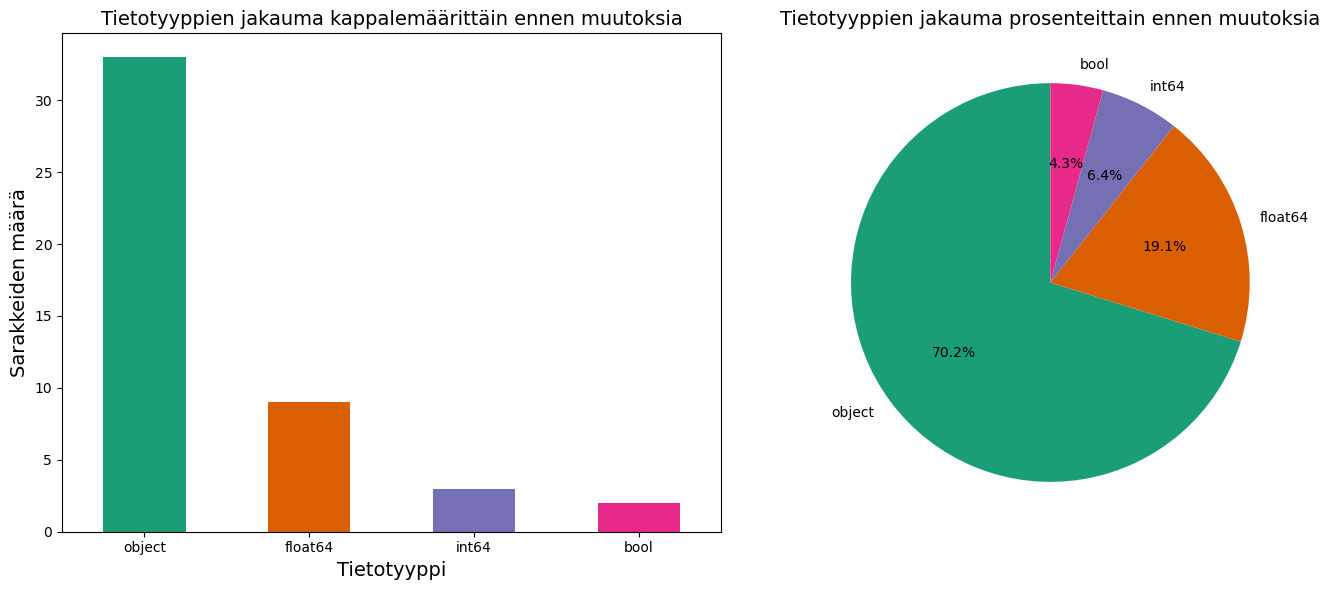

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm

data_types_plot1 = dataframe.dtypes.value_counts()
colors = cm.Dark2.colors

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Barplot
data_types_plot1.plot(
    kind="bar",
    ax=axes[0],
    color=colors
)

axes[0].tick_params(axis="x", rotation=0)
axes[0].set_title("Tietotyyppien jakauma kappalemäärittäin ennen muutoksia", fontsize=14)
axes[0].set_xlabel("Tietotyyppi", fontsize=14)
axes[0].set_ylabel("Sarakkeiden määrä", fontsize=14)

# Pie
data_types_plot1.plot(
    kind="pie",
    ax=axes[1],
    autopct="%1.1f%%",
    startangle=90,
    ylabel="",
    colors=colors
)

axes[1].set_title("Tietotyyppien jakauma prosenteittain ennen muutoksia", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

## Datatyyppien muutoksia:

- Muutetaan objekti-tyyppiset sarakkeet numeeriseksi ja booleaniksi kun mahdollista
- Päivämäärän käsittely
- Sarakkeiden "power" ja "torque" jakaminen kahteen sarakkeeseen, sillä sisältävät kaksi arvoa

In [4]:
# Preprosessataan nämä objekti-kolumnit numeriseksi:

# back_legroom numeriseksi
dataframe['back_legroom'] = dataframe['back_legroom'].astype(str).apply(lambda x: x.split()[0])
dataframe['back_legroom'] = pd.to_numeric(dataframe['back_legroom'], errors='coerce')

# dealer_zip numeriseksi
dataframe['dealer_zip'] = pd.to_numeric(dataframe['dealer_zip'], errors='coerce')
#print(dataframe['dealer_zip'].dtype) - float64

# front_legroom numeriseksi
dataframe['front_legroom'] = dataframe['front_legroom'].astype(str).apply(lambda x: x.split()[0])
dataframe['front_legroom'] = pd.to_numeric(dataframe['front_legroom'], errors='coerce')

# fuel_tank_volume numeriseksi
dataframe['fuel_tank_volume'] = dataframe['fuel_tank_volume'].astype(str).apply(lambda x: x.split()[0])
dataframe['fuel_tank_volume'] = pd.to_numeric(dataframe['fuel_tank_volume'], errors='coerce')

# height numeriseksi
dataframe['height'] = dataframe['height'].astype(str).apply(lambda x: x.split()[0])
dataframe['height'] = pd.to_numeric(dataframe['height'], errors='coerce')

# lenght numeriseksi
dataframe['length'] = dataframe['length'].astype(str).apply(lambda x: x.split()[0])
dataframe['length'] = pd.to_numeric(dataframe['length'], errors='coerce')

# maximum_seating numeriseksi
dataframe['maximum_seating'] = dataframe['maximum_seating'].astype(str).apply(lambda x: x.split()[0])
dataframe['maximum_seating'] = pd.to_numeric(dataframe['maximum_seating'], errors='coerce')

# wheelbase numeriseksi
dataframe['wheelbase'] = dataframe['wheelbase'].astype(str).apply(lambda x: x.split()[0])
dataframe['wheelbase'] = pd.to_numeric(dataframe['wheelbase'], errors='coerce')

# width numeriseksi
dataframe['width'] = dataframe['width'].astype(str).apply(lambda x: x.split()[0])
dataframe['width'] = pd.to_numeric(dataframe['width'], errors='coerce')




#### Histogrammi datatyppien muutoksista

Muutimme arvot numeerisiksi, jolloin histogrammi ryhmitteli arvot loogisiin luokkiin, ja voimme nähdä numeerisen jakauman.

Tämä selkeyttää ja yhtenäistää datan visualisointia sekä tekee sen käyttökelpoiseksi jatkoanalyysissä. Kuvissa näytetty 30 isointa ryhmää luettavuuden säilyttämiseksi.

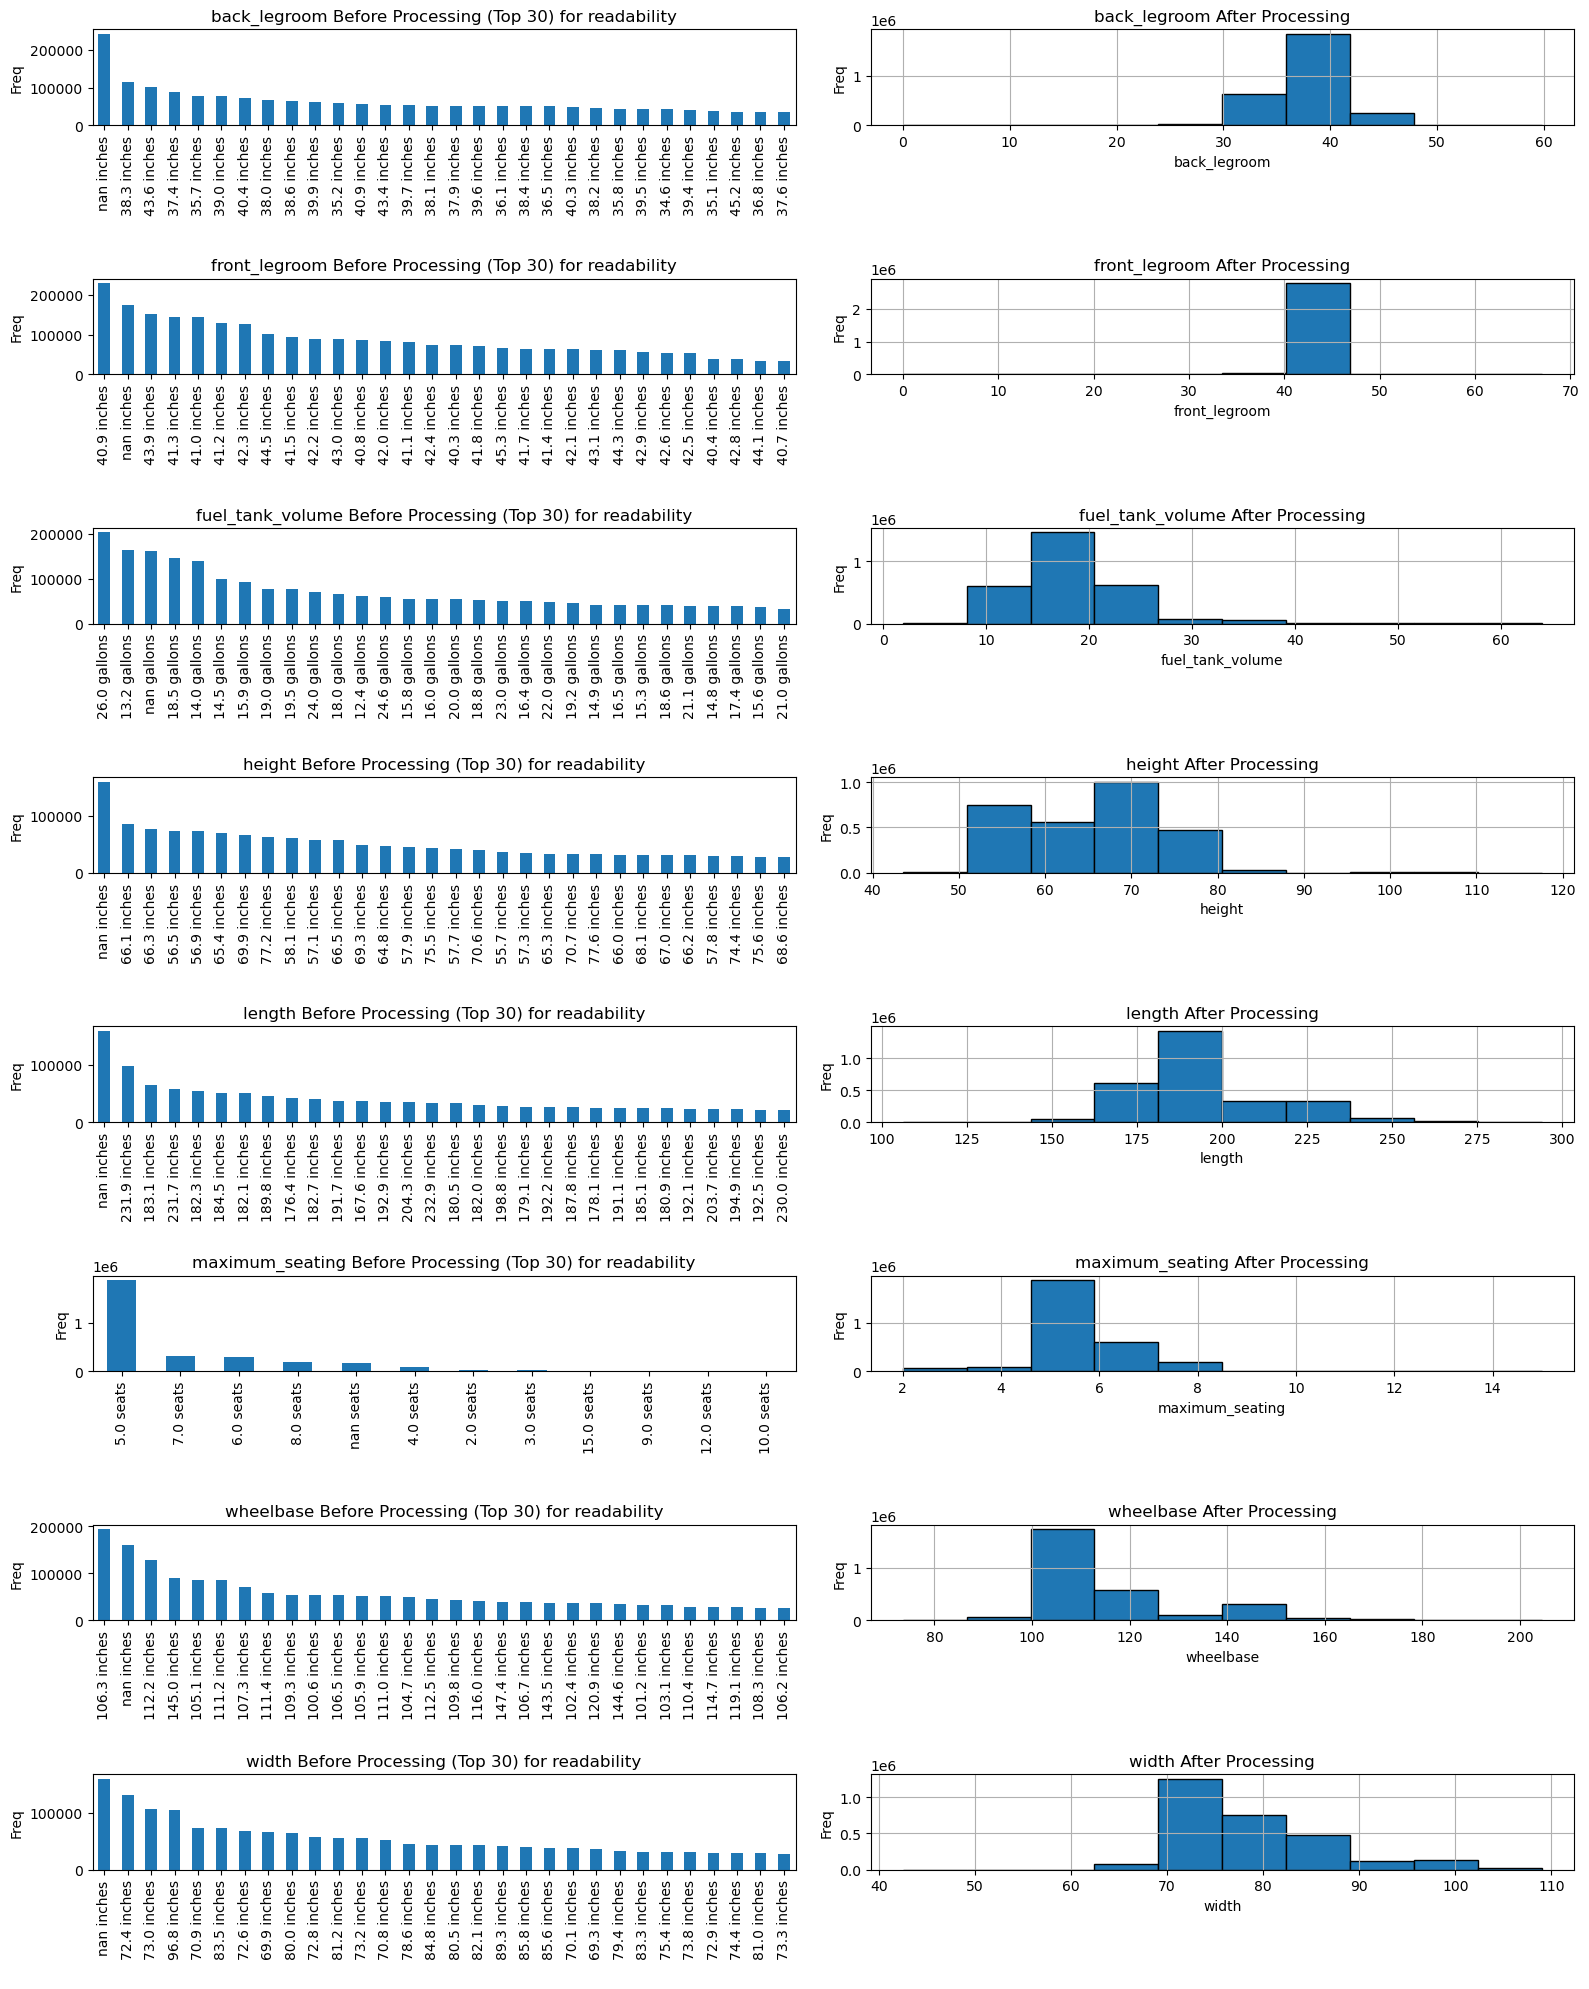

In [5]:
import matplotlib.pyplot as plt

# Simuloidaan alkuperäinen df jotta voidaan vertailla ja muokataan alkuperäiset arvot lisäämällä yksiköt takaisin
original_dataframe = dataframe.copy()

columns_with_units = {
    'back_legroom': 'inches',
    'front_legroom': 'inches',
    'fuel_tank_volume': 'gallons',
    'height': 'inches',
    'length': 'inches',
    'maximum_seating': 'seats',
    'wheelbase': 'inches',
    'width': 'inches'
}

for column, unit in columns_with_units.items():
    original_dataframe[column] = original_dataframe[column].astype(str) + f' {unit}'

columns_to_visualize = [
    'back_legroom', 'front_legroom', 'fuel_tank_volume', 
    'height', 'length', 'maximum_seating', 'wheelbase', 'width'
]

plt.figure(figsize=(16, 20))
for i, column in enumerate(columns_to_visualize, start=1):
    # Ennen preprosessointia
    plt.subplot(len(columns_to_visualize), 2, 2 * i - 1)
    original_dataframe[column].value_counts().head(30).plot(kind='bar')
    plt.title(f'{column} Before Processing (Top 30) for readability')
    plt.xlabel(" ")  # Poistetaan x-akselin otsikko
    plt.ylabel('Freq')
    
    # Jälkeen preprosessoinnin
    plt.subplot(len(columns_to_visualize), 2, 2 * i)
    dataframe[column].hist(bins=10, edgecolor='black')
    plt.title(f'{column} After Processing')
    plt.xlabel(column)
    plt.ylabel('Freq')

plt.tight_layout()
plt.show()



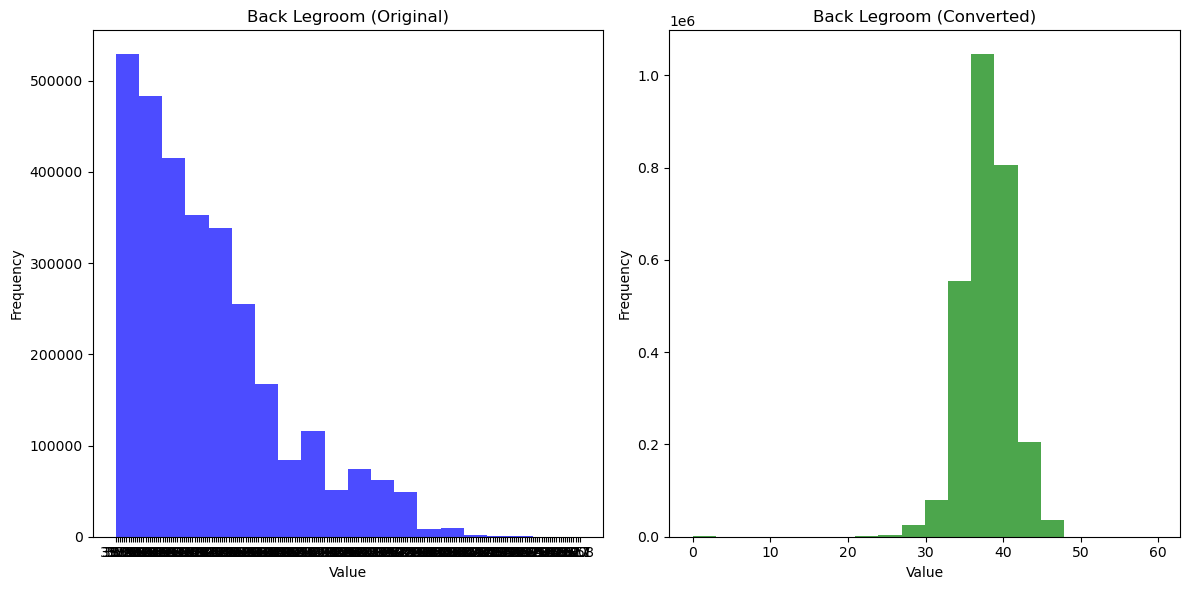

In [6]:
import matplotlib.pyplot as plt

# Histogrammi esimerkki: back_legroom ennen ja jälkeen
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Alkuperäinen jakauma
dataframe['back_legroom_raw'] = dataframe['back_legroom'].astype(str)  # Luo kopio alkuperäisestä
axs[0].hist(dataframe['back_legroom_raw'].dropna(), bins=20, color='blue', alpha=0.7)
axs[0].set_title('Back Legroom (Original)')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Muunnettu jakauma
axs[1].hist(dataframe['back_legroom'].dropna(), bins=20, color='green', alpha=0.7)
axs[1].set_title('Back Legroom (Converted)')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Käsitellään fleet-sarake täyttämällä puuttuvat arvot (NaN) arvolla 'False' ja muuttamalla sarake boolean-tyyppiseksi (True tai False).

Lasketaan kuinka monta True- ja False-arvoa löytyy, ja tulokset näytetään jotta ne voidaan tarkastaa. Sama tehdään myös muille kolumenille alempana.

In [7]:
df_copy = dataframe.copy()

# Fill NaN values with 'False' 
df_copy['fleet'] = df_copy['fleet'].fillna('False') 

# Convert the column to boolean type 
df_copy['fleet'] = df_copy['fleet'].astype(bool) 

# Count the number of True and False values in the 'fleet' column
true_count_fleet = df_copy['fleet'].value_counts().get(True, 0)
false_count_fleet = df_copy['fleet'].value_counts().get(False, 0)
null_count = df_copy['fleet'].isna().sum()
# Create a new DataFrame with the counts
fleet_counts = pd.DataFrame({
    'True': [true_count_fleet],
    'False': [false_count_fleet],
    'Null': [null_count]
})

print(fleet_counts)
print(df_copy['fleet'].dtypes)
# Show the sums of unique values in the 'fleet_3' column
unique_value_counts = df_copy['fleet'].value_counts()

# Display the result
print(unique_value_counts)

      True    False  Null
0  1761533  1238507     0
bool
fleet
True     1761533
False    1238507
Name: count, dtype: int64


In [8]:
# Preprosessataan nämä objekti-kolumnit booleaniksi:

# fleet boolenaiksi
dataframe['fleet'] = dataframe['fleet'].fillna('False')
dataframe['fleet'] = dataframe['fleet'].astype(bool)

# frame_damaged boolenaiksi
dataframe['frame_damaged'] = dataframe['frame_damaged'].fillna('False')
dataframe['frame_damaged'] = dataframe['frame_damaged'].astype(bool)

# has_accidents boolenaiksi
dataframe['has_accidents'] = dataframe['has_accidents'].fillna('False')
dataframe['has_accidents'] = dataframe['has_accidents'].astype(bool)

# isCab booleaniksi
dataframe['isCab'] = dataframe['isCab'].fillna('False')
dataframe['isCab'] = dataframe['isCab'].astype(bool)

# salvage booleaniksi
dataframe['salvage'] = dataframe['salvage'].fillna('False') 
dataframe['salvage'] = dataframe['salvage'].astype(bool)

# theft_title booleaniksi
dataframe['theft_title'] = dataframe['theft_title'].fillna('False')
dataframe['theft_title'] = dataframe['theft_title'].astype(bool)


In [9]:
#Tarkistetatan menikö oikein
true_count_fleet = dataframe['fleet'].value_counts().get(True, 0)
false_count_fleet = dataframe['fleet'].value_counts().get(False, 0)

fleet_counts = pd.DataFrame({
    'True': [true_count_fleet],
    'False': [false_count_fleet]
})

print(fleet_counts)
# Verify the change by checking unique values in the column
print(dataframe['fleet'].unique())
dataframe['fleet']


      True    False
0  1761533  1238507
[ True False]


0           True
1           True
2          False
3           True
4           True
           ...  
3000035     True
3000036     True
3000037    False
3000038    False
3000039    False
Name: fleet, Length: 3000040, dtype: bool

#### Päivämäärän käsittely

Sarake listed_date muunnetaan päivämäärämuotoon (datetime). Päivämääristä luodaan uusia sarakkeita, jotka sisältävät tietoja:
* Vuodesta (listed_year),
* Kuukaudesta (listed_month),
* Viikonpäivästä (listed_dayofweek).

In [10]:
# Päivämäärän käsittely ja luodaan uusia sarakkeita

# muutetaan date datetimeen
dataframe['listed_date'] = pd.to_datetime(dataframe['listed_date'], errors='coerce')

# lisätietoa vuosista päivistä ja kuukausista
dataframe['listed_year'] = dataframe['listed_date'].dt.year
dataframe['listed_month'] = dataframe['listed_date'].dt.month
dataframe['listed_dayofweek'] = dataframe['listed_date'].dt.dayofweek

#### Power- ja Torque-sarakkeiden jakaminen

Sarakkeet power ja torque, jotka sisältävät useita arvoja (esim. "150 hp @ 6000 rpm"), jaetaan kahteen osaan:
* Hevosvoimat (power_hp ja torque_value) otetaan ensimmäisestä arvosta.
* Kierrosluvut (power_rpm ja torque_rpm) otetaan neljännestä arvosta.

Alkuperäiset sarakkeet power ja torque poistetaan, koska ne on jaettu.

In [11]:
# Jaetaan power -sarake hevosvoimiksi (power_hp) ja kierrosluvuiksi (power_rmp)

dataframe['power_hp'] = dataframe['power'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
dataframe['power_rpm'] = dataframe['power'].apply(lambda x: x.split()[3] if isinstance(x, str) and len(x.split()) >= 4 else None)

dataframe['power_hp'] = pd.to_numeric(dataframe['power_hp'], errors='coerce')
dataframe['power_rpm'] = pd.to_numeric(dataframe['power_rpm'], errors='coerce')

# Poistetaan alkuperäinen power -sarake
dataframe.drop(columns=['power'], inplace=True)


In [12]:
# Jaetaan torque samalla tavallu kun power
dataframe['torque_value'] = dataframe['torque'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
dataframe['torque_rpm'] = dataframe['torque'].apply(lambda x: x.split()[3] if isinstance(x, str) and len(x.split()) >= 4 else None)

dataframe['torque_value'] = pd.to_numeric(dataframe['torque_value'], errors='coerce')
dataframe['torque_rpm'] = pd.to_numeric(dataframe['torque_rpm'], errors='coerce')

# Poistetaan alkuperäinen torque -sarake
dataframe.drop(columns=['torque'], inplace=True)



#### Numeristen sarakkeiden siivous

Sarakkeet, kuten front_legroom, fuel_tank_volume, jne., tarkistetaan, sisältävätkö ne virheellisiä arvoja, kuten "--", ja näiden rivien määrä lasketaan.

In [13]:
# Tarkistetaan sisältävätkö rivit "--" arvoja
columns_to_check = ['front_legroom', 'fuel_tank_volume', 'height', 'maximum_seating', 
                    'power_hp', 'power_rpm', 'torque_rpm', 'wheelbase', 'width', 'back_legroom']

for col in columns_to_check:
    count = (dataframe[col] == '--').sum()
    print(f"Column '{col}' has {count} rows with '--'")

Column 'front_legroom' has 0 rows with '--'
Column 'fuel_tank_volume' has 0 rows with '--'
Column 'height' has 0 rows with '--'
Column 'maximum_seating' has 0 rows with '--'
Column 'power_hp' has 0 rows with '--'
Column 'power_rpm' has 0 rows with '--'
Column 'torque_rpm' has 0 rows with '--'
Column 'wheelbase' has 0 rows with '--'
Column 'width' has 0 rows with '--'
Column 'back_legroom' has 0 rows with '--'


### Välitsekkaus sarakkeiden tyyppimuunnoksista.

- Kuvaajista huomataan, että objekti-tyyppisten sarakkeiden määrä alkanut vähentyä.

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 53 columns):
 #   Column                Dtype         
---  ------                -----         
 0   back_legroom          float64       
 1   body_type             object        
 2   city                  object        
 3   city_fuel_economy     float64       
 4   daysonmarket          int64         
 5   dealer_zip            float64       
 6   engine_displacement   float64       
 7   exterior_color        object        
 8   fleet                 bool          
 9   frame_damaged         bool          
 10  franchise_dealer      bool          
 11  franchise_make        object        
 12  front_legroom         float64       
 13  fuel_tank_volume      float64       
 14  fuel_type             object        
 15  has_accidents         bool          
 16  height                float64       
 17  highway_fuel_economy  float64       
 18  horsepower            float64       
 19  

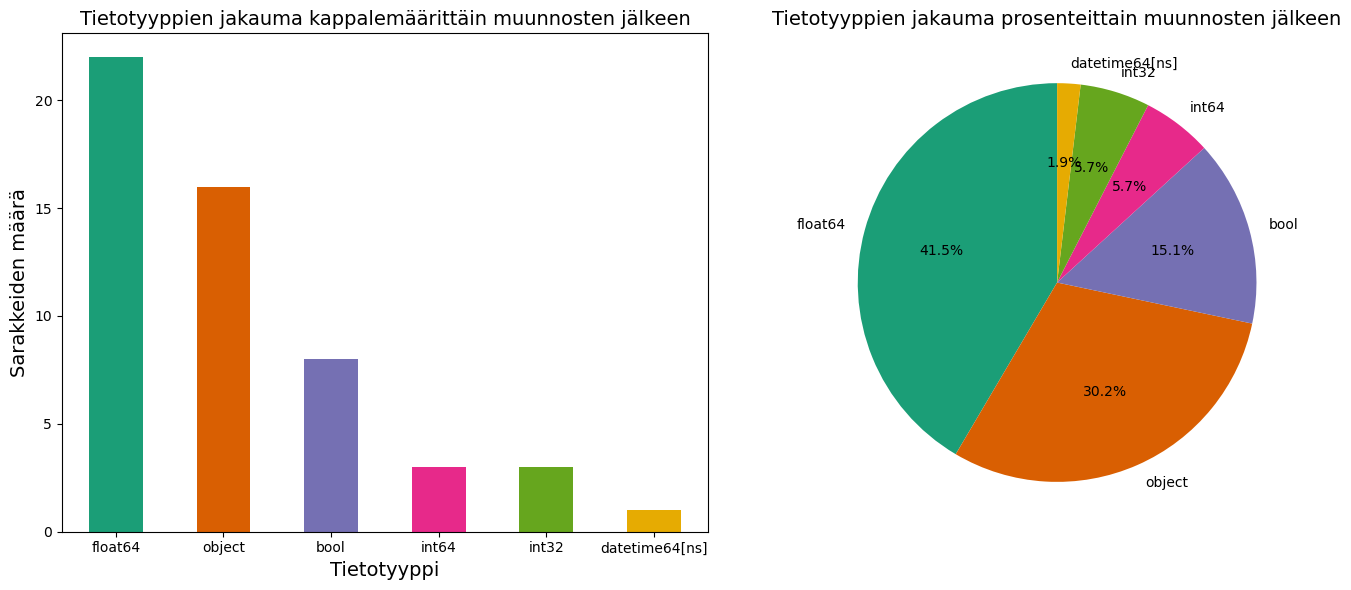

In [15]:
import matplotlib.pyplot as plt

data_types_plot2 = dataframe.dtypes.value_counts()
colors = cm.Dark2.colors

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Barplot
data_types_plot2.plot(
    kind="bar",
    ax=axes[0],
    color=colors
)

axes[0].tick_params(axis="x", rotation=0)
axes[0].set_title("Tietotyyppien jakauma kappalemäärittäin muunnosten jälkeen", fontsize=14)
axes[0].set_xlabel("Tietotyyppi", fontsize=14)
axes[0].set_ylabel("Sarakkeiden määrä", fontsize=14)

# Pie
data_types_plot2.plot(
    kind="pie",
    ax=axes[1],
    autopct="%1.1f%%",
    startangle=90,
    ylabel="",
    colors=colors
)

axes[1].set_title("Tietotyyppien jakauma prosenteittain muunnosten jälkeen", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

### Numeeristen sarakkeiden tilastollinen yhteenveto

In [16]:
print("Statistical Summary of Numerical Columns:")
dataframe = dataframe.query('year >= 1990')
round(dataframe.select_dtypes(exclude = ['object']).describe() , 2)

Statistical Summary of Numerical Columns:


,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,...,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,power_hp,power_rpm,torque_value,torque_rpm
count,2756932.00,2508178.00,2994755.00,2994546.00,2826599.00,2823851.00,2839133.00,2839317.00,2508178.00,2826599.00,...,2839346.00,2839325.00,2994755.00,2994755.00,2994755.00,2994755.00,2517557.00,3927.00,2481197.00,54805.00
mean,37.96,22.70,75.80,50682.97,2968.03,42.20,18.61,65.88,29.48,248.02,...,115.33,78.39,2017.81,2019.92,7.29,3.44,251.42,631.28,265.23,201.00
min,0.00,7.00,0.00,922.00,700.00,0.00,1.90,43.50,10.00,55.00,...,73.50,42.50,1990.00,2010.00,1.00,0.00,55.00,516.00,58.00,200.00
25%,36.00,18.00,14.00,29691.00,2000.00,41.00,14.70,58.10,25.00,175.00,...,106.30,72.40,2017.00,2020.00,7.00,2.00,175.00,600.00,176.00,200.00
50%,38.20,21.00,35.00,48161.00,2500.00,42.00,17.70,66.10,29.00,244.00,...,111.20,77.30,2020.00,2020.00,8.00,3.00,250.00,650.00,258.00,200.00
75%,39.90,26.00,82.00,76691.00,3600.00,43.00,21.10,70.20,33.00,300.00,...,118.90,83.10,2020.00,2020.00,8.00,5.00,308.00,650.00,320.00,200.00
max,59.80,127.00,3599.00,99518.00,8400.00,67.00,64.00,117.60,127.00,1001.00,...,204.50,109.00,2021.00,2020.00,12.00,6.00,949.00,650.00,944.00,400.00
std,3.18,8.81,108.15,27374.39,1348.71,1.51,5.46,7.56,7.77,90.47,...,14.51,7.67,3.65,0.29,2.11,1.66,90.17,27.58,119.63,9.31


## Kategoriset sarakkeet:

- Katsotaan mitä arvoja jäljelle jääneet kategoriset "object" -tyyppiset sarakkeet pitävät sisällään.

- Nämä pitää esikäsitellä mallin ymmärtämään muotoon, esim. encoding.

- Osassa sarakkeita on liikaa uniikkeja arvoja enkoodauksen kannalta.
    - Katsotaan, voidaanko ryhmitellä arvoja, jotta enkoodauksesta tulisi kannattavampaa
    - Harkitaan, voidaanko sarake poistaa: Onko sarakkeessa oleva tieto tärkeä lopputuloksen kannalta

In [17]:
cat_cols = dataframe.select_dtypes(include=['object']).columns
for col in cat_cols:
    unique_values = dataframe[col].unique()
    print(f"Total unique values: {len(unique_values)}")
    print("Top 10 most common values:")
    print(dataframe[col].value_counts().head(10))  # Show top 10 most common values
    print("\n")


Total unique values: 10
Top 10 most common values:
body_type
SUV / Crossover    1416077
Sedan               741213
Pickup Truck        474086
Hatchback            88194
Minivan              79788
Coupe                69537
Van                  47150
Wagon                40464
Convertible          25233
Name: count, dtype: int64


Total unique values: 4686
Top 10 most common values:
city
Houston         43742
San Antonio     24940
Columbus        18314
Miami           18028
Jacksonville    16826
Las Vegas       16365
Tampa           15325
Phoenix         14785
Dallas          14624
Orlando         14487
Name: count, dtype: int64


Total unique values: 28203
Top 10 most common values:
exterior_color
Black                     161928
White                     126098
Summit White               96432
Silver                     78741
Gray                       77461
Oxford White               59089
Blue                       50822
Bright White Clearcoat     43467
Red                        42

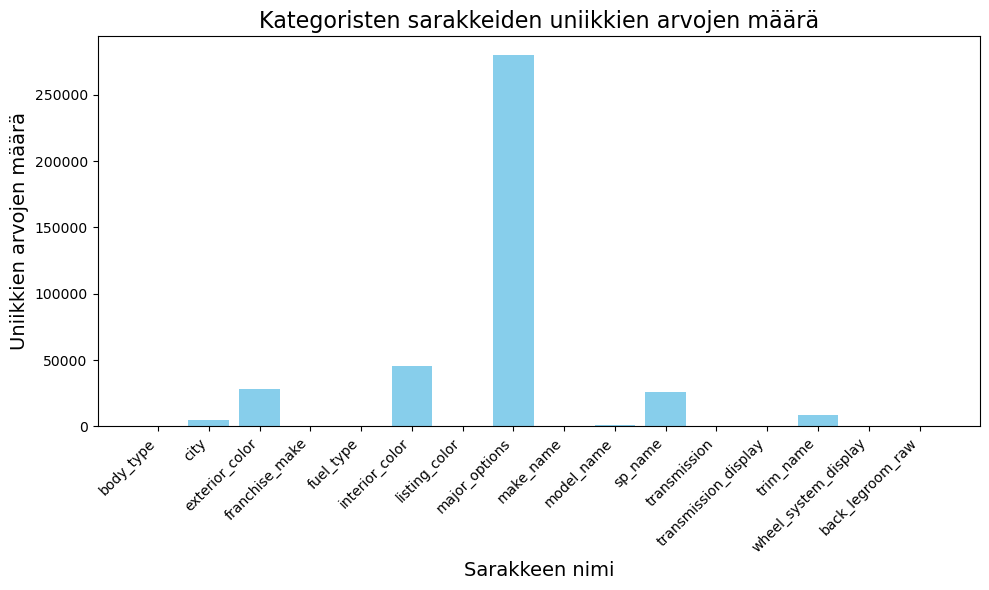

In [18]:
import matplotlib.pyplot as plt

cat_cols = dataframe.select_dtypes(include=['object']).columns

unique_counts = {col: dataframe[col].nunique() for col in cat_cols}


plt.figure(figsize=(10,6))
plt.bar(unique_counts.keys(), unique_counts.values(), color="skyblue")

plt.title("Kategoristen sarakkeiden uniikkien arvojen määrä", fontsize=16)
plt.xlabel("Sarakkeen nimi", fontsize=14)
plt.ylabel("Uniikkien arvojen määrä", fontsize=14)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


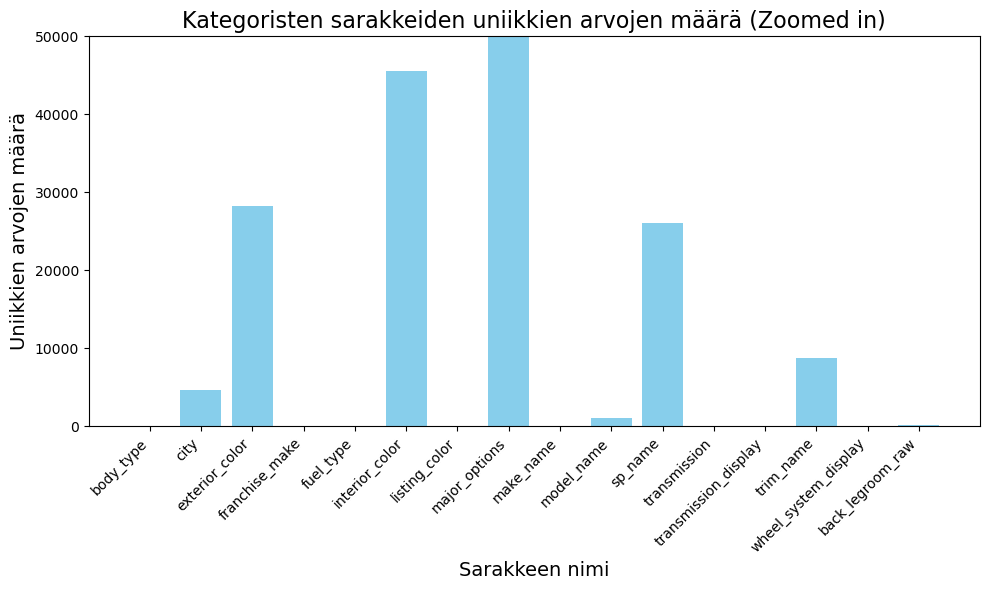

In [19]:
# Zoomattu pylväskaavio
plt.figure(figsize=(10, 6))

plt.bar(unique_counts.keys(), unique_counts.values(), color="skyblue")

plt.title("Kategoristen sarakkeiden uniikkien arvojen määrä (Zoomed in)", fontsize=16)
plt.xlabel("Sarakkeen nimi", fontsize=14)
plt.ylabel("Uniikkien arvojen määrä", fontsize=14)
plt.xticks(rotation=45, ha="right")

# Zoomattu y-akselin mukaan
plt.ylim(0, 50000)

plt.tight_layout()
plt.show()


### Sisältävätkö kategoriset sarakkeet NaN-arvoja:

In [20]:
cat_cols = dataframe.select_dtypes(include=['object']).columns

# Calculate null counts for each categorical column
null_counts = dataframe[cat_cols].isnull().sum().sort_values(ascending=False)
print(null_counts)

franchise_make          567958
interior_color          382838
major_options           195471
wheel_system_display    142758
trim_name               113358
fuel_type                78937
transmission             63526
transmission_display     63526
exterior_color           49430
body_type                13013
city                         0
listing_color                0
make_name                    0
model_name                   0
sp_name                      0
back_legroom_raw             0
dtype: int64


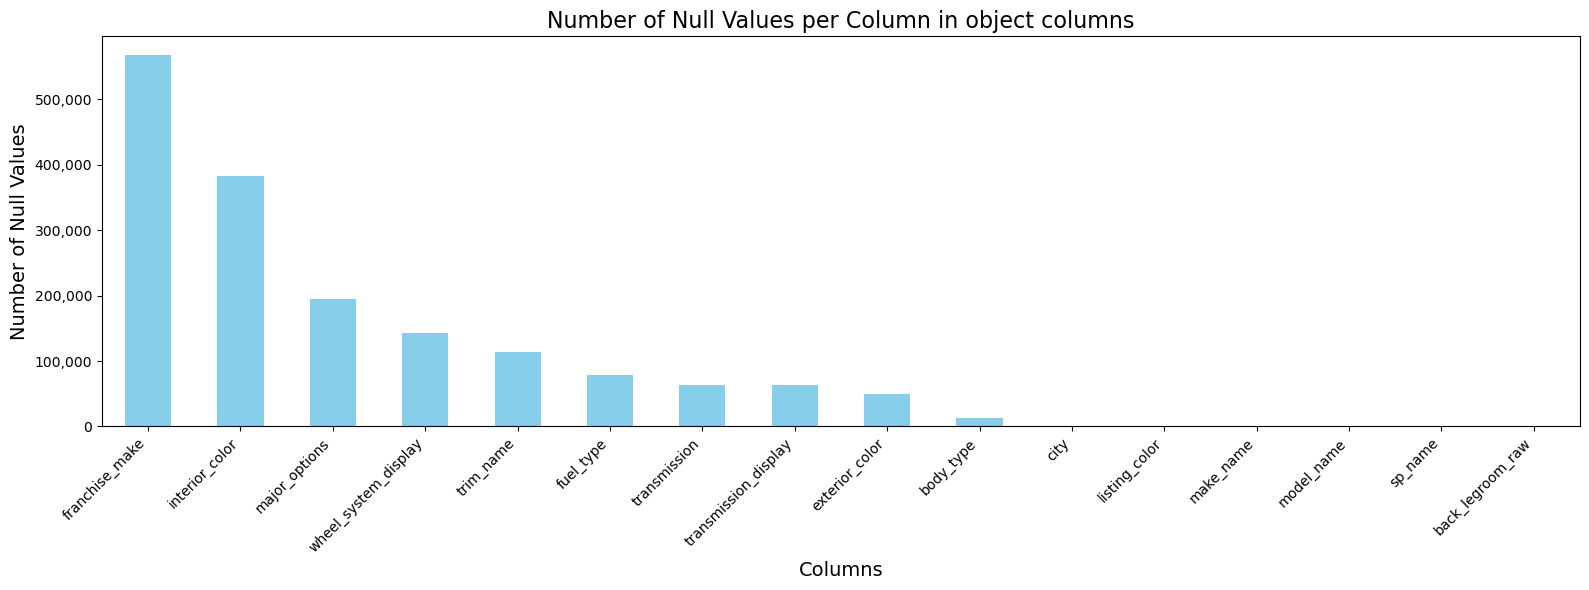

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
null_counts.plot.bar(color='skyblue')
plt.title('Number of Null Values per Column in object columns', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Null Values', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

## NaN-arvojen kasittely

- Katsotaan sarakkeittain NaN-arvojen määriä suuruusjärjestyksessä, sis sekä numeeriset että kategoriset sarakkeet
- Yhdistetään 'make_name' ja 'franchise_make' -sarakkeet, sillä suuri osa arvoista yhtenäisiä
- Poistetaan sarakkeet, jotka pitävät sisällään suurimman määrän NaN-arvoja
- Lopuksi poistetaan kaikki rivit, jotka pitävät sisällään NaN-arvoja

In [22]:
nan_counts = pd.DataFrame({'Column': dataframe.columns, 'NaN_Count': dataframe.isna().sum()}).reset_index(drop=True)
nan_counts_sorted = nan_counts.sort_values(by='NaN_Count', ascending=False).reset_index(drop=True)

print(f"Rivien määrä: {len(dataframe)}")
print(f"Sarakkeiden määrä: {len(dataframe.columns)}")
print("tyhjien arvojen määrä per sarake")
print(nan_counts_sorted)

Rivien määrä: 2994755
Sarakkeiden määrä: 53
tyhjien arvojen määrä per sarake
                  Column  NaN_Count
0              power_rpm    2990828
1             torque_rpm    2939950
2            owner_count    1513070
3         franchise_make     567958
4           torque_value     513558
5      city_fuel_economy     486577
6   highway_fuel_economy     486577
7               power_hp     477198
8         interior_color     382838
9           back_legroom     237823
10         major_options     195471
11         front_legroom     170904
12   engine_displacement     168156
13            horsepower     168156
14      fuel_tank_volume     155622
15       maximum_seating     155477
16                height     155438
17                length     155431
18                 width     155430
19             wheelbase     155409
20               mileage     143204
21  wheel_system_display     142758
22             trim_name     113358
23             fuel_type      78937
24          transmissio

### Katsotaan paljonko power_rpm -sarake pitää sisällään ei-NaN arvoja
- Tuloksena saadaan, että sarake pitää sisällään niin vähän oikeita arvoja, että sarake tullaan poistamaan pian

In [23]:
# Filter rows with non-NaN values in 'power_rpm'
filtered_df = dataframe[dataframe['power_rpm'].notna()]

len(filtered_df)

3927

### franchise_make ja make_name

- Huomataan, että franchise_make ja make_name käytännössä tarkoittavat samaa asiaa
- Korvataan franchise_make -sarakkeen NaN-arvot make_name -sarakkeen arvoilla

In [24]:
# Replace NaN in franchise_make with values from make_name
dataframe['franchise_make'] = dataframe['franchise_make'].fillna(dataframe['make_name'])

# Find rows where franchise_make is different from make_name
mismatch_count = (dataframe['franchise_make'] != dataframe['make_name']).sum()

print(f"Number of rows with different franchise_make and make_name: {mismatch_count}")

Number of rows with different franchise_make and make_name: 467787


In [25]:
#tarkistetaan nyt franchise make

nan_counts = pd.DataFrame({'Column': dataframe.columns, 'NaN_Count': dataframe.isna().sum()}).reset_index(drop=True)
nan_counts_sorted = nan_counts.sort_values(by='NaN_Count', ascending=False).reset_index(drop=True)

print(f"Rivien määrä: {len(dataframe)}")
print(f"Sarakkeiden määrä: {len(dataframe.columns)}")
print("tyhjien arvojen määrä per sarake")
print(nan_counts_sorted)

Rivien määrä: 2994755
Sarakkeiden määrä: 53
tyhjien arvojen määrä per sarake
                  Column  NaN_Count
0              power_rpm    2990828
1             torque_rpm    2939950
2            owner_count    1513070
3           torque_value     513558
4   highway_fuel_economy     486577
5      city_fuel_economy     486577
6               power_hp     477198
7         interior_color     382838
8           back_legroom     237823
9          major_options     195471
10         front_legroom     170904
11            horsepower     168156
12   engine_displacement     168156
13      fuel_tank_volume     155622
14       maximum_seating     155477
15                height     155438
16                length     155431
17                 width     155430
18             wheelbase     155409
19               mileage     143204
20  wheel_system_display     142758
21             trim_name     113358
22             fuel_type      78937
23  transmission_display      63526
24          transmissio

### Poistetaan kolme eniten tyhjiä arvoja sisältävää saraketta

Poistettavat sarakkeet ovat:
1. power_rpm, 
2. torque_rpm,
3. owner_count


In [26]:
dataframe.drop(columns=['power_rpm', 'torque_rpm', 'owner_count'], inplace=True)

nan_counts = pd.DataFrame({'Column': dataframe.columns, 'NaN_Count': dataframe.isna().sum()}).reset_index(drop=True)
nan_counts_sorted = nan_counts.sort_values(by='NaN_Count', ascending=False).reset_index(drop=True)

print(f"Rivien määrä: {len(dataframe)}")
print(f"Sarakkeiden määrä: {len(dataframe.columns)}")
print("tyhjien arvojen määrä per sarake")
print(nan_counts_sorted.head(10))

Rivien määrä: 2994755
Sarakkeiden määrä: 50
tyhjien arvojen määrä per sarake
                 Column  NaN_Count
0          torque_value     513558
1  highway_fuel_economy     486577
2     city_fuel_economy     486577
3              power_hp     477198
4        interior_color     382838
5          back_legroom     237823
6         major_options     195471
7         front_legroom     170904
8            horsepower     168156
9   engine_displacement     168156


### Testataan paljonko jää rivejä jos poistetaan kaikki rivit, jotka sisältää NaN-arvoja

In [27]:
cleaned_df = dataframe.dropna()

print(cleaned_df.shape)

(1686514, 50)


### Poistetaan seuraavat 3 eniten tyhjiä arvoja sisältävää saraketta

Poistettavat sarakkeet ovat:
1. torque_value, 
2. highway_fuel_economy,
3. city_fuel_economy

Poistetaan myös "power_hp" -niminen sarake, sillä siinä samat arvot kuin "horsepower" -sarakkeessa.

In [28]:
dataframe.drop(columns=['torque_value', 'highway_fuel_economy', 'city_fuel_economy', 'power_hp'], inplace=True)

nan_counts = pd.DataFrame({'Column': dataframe.columns, 'NaN_Count': dataframe.isna().sum()}).reset_index(drop=True)
nan_counts_sorted = nan_counts.sort_values(by='NaN_Count', ascending=False).reset_index(drop=True)

print(f"Rivien määrä: {len(dataframe)}")
print(f"Sarakkeiden määrä: {len(dataframe.columns)}")
print("tyhjien arvojen määrä per sarake")
print(nan_counts_sorted.head(10))

Rivien määrä: 2994755
Sarakkeiden määrä: 46
tyhjien arvojen määrä per sarake
                Column  NaN_Count
0       interior_color     382838
1         back_legroom     237823
2        major_options     195471
3        front_legroom     170904
4           horsepower     168156
5  engine_displacement     168156
6     fuel_tank_volume     155622
7      maximum_seating     155477
8               height     155438
9               length     155431


### Uusi testaus paljonko jää rivejä jos poistetaan kaikki rivit, jotka sisältää NaN-arvoja

- Todetaan, että rivejä jää nyt riittävä määrä, eikä haluta enää poistaa sarakkeita

In [29]:
#sp_name:ssa myyjän lisäämiä asioita esim. GT, Sport, kaupunki missä myynnissä
#trim_name trimmattu nimi
#transmission_display tarkemmat arvot vaihteille, monta erilaista tekstiä, jätetään transmission -sarake kuvaamaan automati, manual, ctv ja dual clutchia.
dataframe.drop(columns=['exterior_color', 'interior_color', 'sp_name', 'trim_name', 'transmission_display', 'back_legroom_raw'], inplace=True)


cleaned_df2 = dataframe.dropna()

print(cleaned_df2.shape)
print(cleaned_df2.columns)
pd.set_option('display.max_columns', None)

#len(cleaned_df2['sp_name'].unique())
cleaned_df2.head(5)


(2374936, 40)
Index(['back_legroom', 'body_type', 'city', 'daysonmarket', 'dealer_zip',
       'engine_displacement', 'fleet', 'frame_damaged', 'franchise_dealer',
       'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type',
       'has_accidents', 'height', 'horsepower', 'isCab', 'is_new', 'length',
       'listed_date', 'listing_color', 'major_options', 'make_name',
       'maximum_seating', 'mileage', 'model_name', 'price', 'salvage',
       'savings_amount', 'seller_rating', 'sp_id', 'theft_title',
       'transmission', 'wheel_system_display', 'wheelbase', 'width', 'year',
       'listed_year', 'listed_month', 'listed_dayofweek'],
      dtype='object')


,back_legroom,body_type,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,transmission,wheel_system_display,wheelbase,width,year,listed_year,listed_month,listed_dayofweek
0,35.1,SUV / Crossover,Bayamon,522,960.0,1300.0,True,True,True,Jeep,41.2,12.7,Gasoline,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599.0,True,A,Front-Wheel Drive,101.2,79.6,2019,2019,4,5
1,38.1,SUV / Crossover,San Juan,207,922.0,2000.0,True,True,True,Land Rover,39.1,17.7,Gasoline,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227.0,True,A,All-Wheel Drive,107.9,85.6,2020,2020,2,5
4,38.1,SUV / Crossover,San Juan,137,922.0,2000.0,True,True,True,Land Rover,39.1,17.7,Gasoline,True,68.0,246.0,True,True,181.0,2020-04-25,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,7.0,Discovery Sport,48880.0,True,0,3.0,389227.0,True,A,All-Wheel Drive,107.9,85.6,2020,2020,4,5
5,37.1,SUV / Crossover,San Juan,242,922.0,2000.0,False,False,True,Land Rover,40.2,16.6,Gasoline,False,66.3,247.0,False,True,188.9,2020-01-11,UNKNOWN,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Land Rover,5.0,12.0,Range Rover Velar,66903.0,False,0,3.0,389227.0,False,A,All-Wheel Drive,113.1,84.4,2020,2020,1,5
6,35.1,Sedan,Bayamon,447,960.0,2500.0,True,True,True,Jeep,42.3,13.2,Gasoline,True,56.9,186.0,True,True,183.5,2019-06-20,SILVER,"['Alloy Wheels', 'Bluetooth', 'Backup Camera']",Mazda,5.0,14.0,MAZDA3,23695.0,True,0,2.8,370599.0,True,A,Front-Wheel Drive,107.3,70.7,2019,2019,6,3


## Datan One-Hot enkoodaus

### One-Hot enkoodaus "fuel_type"-sarake

In [30]:
cleaned_df2['fuel_type'].unique()

cleaned_df2 = pd.get_dummies(cleaned_df2, columns=['fuel_type'], prefix='fuel_type')
cleaned_df2.head(2)

,back_legroom,body_type,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,transmission,wheel_system_display,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Compressed Natural Gas,fuel_type_Diesel,fuel_type_Electric,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Propane
0,35.1,SUV / Crossover,Bayamon,522,960.0,1300.0,True,True,True,Jeep,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599.0,True,A,Front-Wheel Drive,101.2,79.6,2019,2019,4,5,False,False,False,False,False,True,False,False
1,38.1,SUV / Crossover,San Juan,207,922.0,2000.0,True,True,True,Land Rover,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227.0,True,A,All-Wheel Drive,107.9,85.6,2020,2020,2,5,False,False,False,False,False,True,False,False


### One-Hot enkoodaus "wheel_system_display"-sarake

In [31]:
cleaned_df2['wheel_system_display'].unique()

cleaned_df2 = pd.get_dummies(cleaned_df2, columns=['wheel_system_display'], prefix='wheel')
cleaned_df2.head(2)

,back_legroom,body_type,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,transmission,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Compressed Natural Gas,fuel_type_Diesel,fuel_type_Electric,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Propane,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive
0,35.1,SUV / Crossover,Bayamon,522,960.0,1300.0,True,True,True,Jeep,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599.0,True,A,101.2,79.6,2019,2019,4,5,False,False,False,False,False,True,False,False,False,False,False,True,False
1,38.1,SUV / Crossover,San Juan,207,922.0,2000.0,True,True,True,Land Rover,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227.0,True,A,107.9,85.6,2020,2020,2,5,False,False,False,False,False,True,False,False,False,True,False,False,False


### One-Hot enkoodaus "transmission"-sarake

In [32]:
cleaned_df2['transmission'].unique()

cleaned_df2 = pd.get_dummies(cleaned_df2, columns=['transmission'], prefix='transmission')
cleaned_df2.head(2)

,back_legroom,body_type,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Compressed Natural Gas,fuel_type_Diesel,fuel_type_Electric,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Propane,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M
0,35.1,SUV / Crossover,Bayamon,522,960.0,1300.0,True,True,True,Jeep,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599.0,True,101.2,79.6,2019,2019,4,5,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False
1,38.1,SUV / Crossover,San Juan,207,922.0,2000.0,True,True,True,Land Rover,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227.0,True,107.9,85.6,2020,2020,2,5,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False


### One-Hot enkoodaus "body_type"-sarake

In [33]:
cleaned_df2['body_type'].unique()

cleaned_df2 = pd.get_dummies(cleaned_df2, columns=['body_type'], prefix='body_type')
cleaned_df2.head(2)

,back_legroom,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Compressed Natural Gas,fuel_type_Diesel,fuel_type_Electric,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Propane,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon
0,35.1,Bayamon,522,960.0,1300.0,True,True,True,Jeep,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599.0,True,101.2,79.6,2019,2019,4,5,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,38.1,San Juan,207,922.0,2000.0,True,True,True,Land Rover,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227.0,True,107.9,85.6,2020,2020,2,5,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


### One-Hot enkoodaus "listing_color"-sarake

In [34]:
cleaned_df2['listing_color'].unique()

# Define the color mapping for the listing_color column
color_mapping = {
    'BLACK': 'black, unknown',
    'UNKNOWN': 'black, unknown',
    'YELLOW': 'yellow, orange, gold',
    'ORANGE': 'yellow, orange, gold',
    'GOLD': 'yellow, orange, gold',
    'WHITE': 'white, gray, silver',
    'GRAY': 'white, gray, silver',
    'SILVER': 'white, gray, silver',
    'RED': 'red, blue, green, brown',
    'BLUE': 'red, blue, green, brown',
    'GREEN': 'red, blue, green, brown',
    'BROWN': 'red, blue, green, brown',
    'PURPLE': 'purple, pink, teal',
    'PINK': 'purple, pink, teal',
    'TEAL': 'purple, pink, teal'
}

# Create the new column based on the color mapping
cleaned_df2['combined_listing_color'] = cleaned_df2['listing_color'].map(color_mapping)

# Check the result
print(cleaned_df2[['listing_color', 'combined_listing_color']].head())

cleaned_df2 = pd.get_dummies(cleaned_df2, columns=['combined_listing_color'], prefix='listing_color')
cleaned_df2.head(2)

  listing_color combined_listing_color
0        YELLOW   yellow, orange, gold
1         BLACK         black, unknown
4         BLACK         black, unknown
5       UNKNOWN         black, unknown
6        SILVER    white, gray, silver


,back_legroom,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Compressed Natural Gas,fuel_type_Diesel,fuel_type_Electric,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Propane,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,"listing_color_black, unknown","listing_color_purple, pink, teal","listing_color_red, blue, green, brown","listing_color_white, gray, silver","listing_color_yellow, orange, gold"
0,35.1,Bayamon,522,960.0,1300.0,True,True,True,Jeep,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599.0,True,101.2,79.6,2019,2019,4,5,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
1,38.1,San Juan,207,922.0,2000.0,True,True,True,Land Rover,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227.0,True,107.9,85.6,2020,2020,2,5,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False


### One-Hot enkoodaus "major_options"-sarake

In [35]:
# Ominaisuuksien yleisyys datassa
major_options_counts = cleaned_df2["major_options"].str.strip("[]").str.replace("'", "").str.split(", ").explode().value_counts()
print(major_options_counts)

major_options
Backup Camera                        1873697
Bluetooth                            1672365
Alloy Wheels                         1583293
Heated Seats                         1046817
Navigation System                     885312
                                      ...   
Grand Tour Package                         9
Z85 Package                                5
Appearance and Protection Package          4
Levant Package                             2
Adaptive Ride Package                      2
Name: count, Length: 145, dtype: int64


- 143 kpl eri ominaisuuksia, kaikkia ei voi eikä kannata ottaa mukaan, sillä muuten tulee liikaa sarakkeita, eikä loppupäässä ominaisuudet ole tarpeeksi yleisiä. 

- Testataan kuinka paljon valitut ominaisuudet kattavat

In [36]:
covers_from_cars = major_options_counts.cumsum() / major_options_counts.sum()

optimal_features = (covers_from_cars <= 0.80).sum()
print(f"Jos valitaan {optimal_features} kpl ominaisuuksia, se kattaisi 80 % datasta.")

Jos valitaan 12 kpl ominaisuuksia, se kattaisi 80 % datasta.


- 20 isointa ominaisuutta ovat:

In [37]:
print("Top 20 isoimmat ominaisuudet:\n")
print(major_options_counts.head(20))


Top 20 isoimmat ominaisuudet:

major_options
Backup Camera              1873697
Bluetooth                  1672365
Alloy Wheels               1583293
Heated Seats               1046817
Navigation System           885312
Sunroof/Moonroof            814719
Remote Start                811304
CarPlay                     730841
Leather Seats               689369
Blind Spot Monitoring       672490
Android Auto                652580
Parking Sensors             445629
Adaptive Cruise Control     412071
Third Row Seating           308335
Quick Order Package         216728
Steel Wheels                186119
Convenience Package         161609
Premium Package             138694
Tow Package                 107186
Appearance Package           89493
Name: count, dtype: int64


- Huomataan, että 13. ja 14. välissä on suurempi ero, joten otetaan mukaan 13 yleisintä ominaisuutta.

In [38]:
import ast

# Varmistetaan, että kaikki arvot ovat listoja
cleaned_df2['major_options'] = cleaned_df2['major_options'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

print(cleaned_df2["major_options"].head(10))

0                                 [Quick Order Package]
1                             [Adaptive Cruise Control]
4                             [Adaptive Cruise Control]
5     [Leather Seats, Sunroof/Moonroof, Navigation S...
6              [Alloy Wheels, Bluetooth, Backup Camera]
7                             [Adaptive Cruise Control]
8     [Navigation System, Backup Camera, Blind Spot ...
9     [Leather Seats, Navigation System, Adaptive Cr...
11                                [Convenience Package]
13                            [Adaptive Cruise Control]
Name: major_options, dtype: object


Testataan ottaa 13 yleisintä ominaisuutta ja muut ominaisuudet voitaisiin ryhmitellä yhteen.

In [39]:
top_13_options = major_options_counts.head(13).index

def clean_major_options(options):

    cleaned_options = [option for option in options if option in top_13_options]
    if len(cleaned_options) < len(options):
        cleaned_options.append("Other Option")
    
    return cleaned_options

cleaned_df2["major_options"] = cleaned_df2["major_options"].apply(clean_major_options)

print(cleaned_df2["major_options"].head(10))


0                                        [Other Option]
1                             [Adaptive Cruise Control]
4                             [Adaptive Cruise Control]
5     [Leather Seats, Sunroof/Moonroof, Navigation S...
6              [Alloy Wheels, Bluetooth, Backup Camera]
7                             [Adaptive Cruise Control]
8     [Navigation System, Backup Camera, Blind Spot ...
9     [Leather Seats, Navigation System, Adaptive Cr...
11                                       [Other Option]
13                            [Adaptive Cruise Control]
Name: major_options, dtype: object


In [40]:
top_13_options = list(major_options_counts.head(13).index)

all_options = top_13_options + ["Other Option"]

print(all_options)

['Backup Camera', 'Bluetooth', 'Alloy Wheels', 'Heated Seats', 'Navigation System', 'Sunroof/Moonroof', 'Remote Start', 'CarPlay', 'Leather Seats', 'Blind Spot Monitoring', 'Android Auto', 'Parking Sensors', 'Adaptive Cruise Control', 'Other Option']


In [41]:
# Funktio, joka luo binäärikolumnit
def encode_options(options):
    encoding = {option: 1 if option in options else 0 for option in all_options}
    return encoding

# Käytetään funktiota DataFrameen
major_options_encoded = cleaned_df2["major_options"].apply(encode_options).apply(pd.Series)

major_options_encoded.columns = ["major_options_" + col for col in major_options_encoded.columns]

# Yhdistetään alkuperäisen DataFrame kanssa
cleaned_df2 = pd.concat([cleaned_df2, major_options_encoded], axis=1)


cleaned_df2.head(2)


,back_legroom,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Compressed Natural Gas,fuel_type_Diesel,fuel_type_Electric,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Propane,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,"listing_color_black, unknown","listing_color_purple, pink, teal","listing_color_red, blue, green, brown","listing_color_white, gray, silver","listing_color_yellow, orange, gold",major_options_Backup Camera,major_options_Bluetooth,major_options_Alloy Wheels,major_options_Heated Seats,major_options_Navigation System,major_options_Sunroof/Moonroof,major_options_Remote Start,major_options_CarPlay,major_options_Leather Seats,major_options_Blind Spot Monitoring,major_options_Android Auto,major_options_Parking Sensors,major_options_Adaptive Cruise Control,major_options_Other Option
0,35.1,Bayamon,522,960.0,1300.0,True,True,True,Jeep,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,[Other Option],Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599.0,True,101.2,79.6,2019,2019,4,5,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,38.1,San Juan,207,922.0,2000.0,True,True,True,Land Rover,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,[Adaptive Cruise Control],Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227.0,True,107.9,85.6,2020,2020,2,5,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0


- Poistetaan alkuperäinen major_option -sarake

In [42]:
cleaned_df2 = cleaned_df2.drop(columns=["major_options"])
cleaned_df2.head(2)

,back_legroom,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Compressed Natural Gas,fuel_type_Diesel,fuel_type_Electric,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Propane,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,"listing_color_black, unknown","listing_color_purple, pink, teal","listing_color_red, blue, green, brown","listing_color_white, gray, silver","listing_color_yellow, orange, gold",major_options_Backup Camera,major_options_Bluetooth,major_options_Alloy Wheels,major_options_Heated Seats,major_options_Navigation System,major_options_Sunroof/Moonroof,major_options_Remote Start,major_options_CarPlay,major_options_Leather Seats,major_options_Blind Spot Monitoring,major_options_Android Auto,major_options_Parking Sensors,major_options_Adaptive Cruise Control,major_options_Other Option
0,35.1,Bayamon,522,960.0,1300.0,True,True,True,Jeep,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599.0,True,101.2,79.6,2019,2019,4,5,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,38.1,San Juan,207,922.0,2000.0,True,True,True,Land Rover,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227.0,True,107.9,85.6,2020,2020,2,5,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Tällaisenaan "Other options" sarake, joka sisältää kaikki muut ominaisuudet jotka eivät ole 13 suosituimman joukossa, sisältäisi lukumäärältää aika paljon ominaisuuksia..

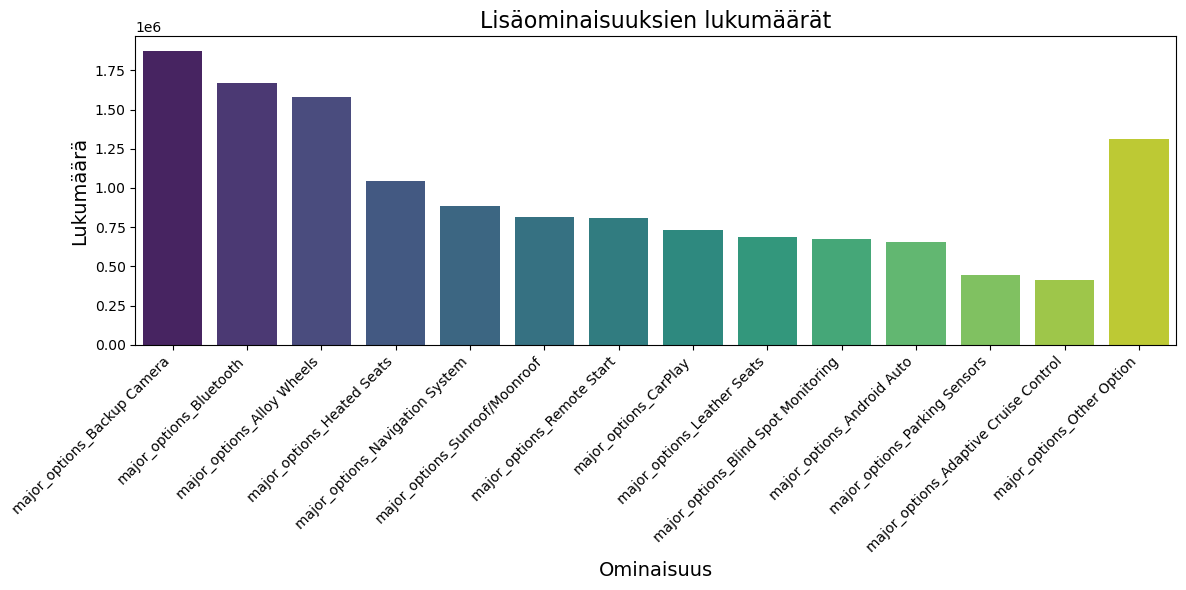

In [43]:
import seaborn as sns

major_options_cols = cleaned_df2.filter(like='major_options').columns

option_counts = cleaned_df2[major_options_cols].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=option_counts.index, y=option_counts.values, palette="viridis")

plt.title("Lisäominaisuuksien lukumäärät", fontsize=16)
plt.xlabel("Ominaisuus", fontsize=14)
plt.ylabel("Lukumäärä", fontsize=14)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()



## Poikkeavien arvojen tunnistaminen (Outliers)

Tulostetaan jokaisen numeerisen sarakkeen:
* Alimmat ja ylimmät poikkeavat arvot ja ylimmät poikkeavat arvot
* Jos arvoja ei ole, se tarkoittaa ettei poikkevia arvoja löydy halutun rajan alapuolelta. Tämä riippuu datan jakaumasta.
* head näyttää viisi ensimmäistä poikkeamaa jotka löytyvät, pitää miettiä onko tämä paras ratkaisu. Alla mahd. ratkaisu.

```
min_outliers = df[df[col] < lower_bound]
max_outliers = df[df[col] > upper_bound]

outlier_rows[col] = {
    'min_count': len(min_outliers),
    'max_count': len(max_outliers),
    'min_outliers_head': min_outliers.nsmallest(5, col)[col],  # 5 pienintä poikkeamaa
    'max_outliers_head': max_outliers.nlargest(5, col)[col]   # 5 suurinta poikkeamaa
}
```

* Mahdollisesti vielä kuvan lisäys

In [44]:
# Säilytetään hyyväksi todetut sarakkeet
columns_to_keep = [
    'back_legroom', 'daysonmarket', 'engine_displacement', 'front_legroom', 
    'fuel_tank_volume', 'height', 'horsepower', 'length', 'listed_date', 
    'maximum_seating', 'mileage', 'price', 'savings_amount', 'seller_rating', 
    'wheelbase', 'width', 'year', 'listed_year', 'listed_month'
]

# Luodaan uusi DataFrame vain säilytettävillä sarakkeilla
outlier_test_df = cleaned_df2[columns_to_keep].copy()

# Vaihdettiin outlier menetelmä IQR sillä se on ymmärtääkseni parempi kun data ei ole vielä normaalisti jakautunut ja se ei ole niiin riippuvainen äärimmäisistä arvoista
def check_outliers_iqr(df):
    outlier_rows = {}
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        min_outliers = df[df[col] < lower_bound]
        max_outliers = df[df[col] > upper_bound]
        outlier_rows[col] = {
            'min_count': len(min_outliers),
            'max_count': len(max_outliers),
            'min_outliers_head': min_outliers.head()[col],
            'max_outliers_head': max_outliers.head()[col]
        }
    return outlier_rows

outlier_info_iqr = check_outliers_iqr(outlier_test_df)

# Tulostetaan poikkeamien tulokset luettavasti
for col, info in outlier_info_iqr.items():
    print(f"Sarake: {col}")
    print(f"  - Alle alemman rajan poikkeamat: (5)")
    print(info['min_outliers_head'])
    print(f"  - Yli ylemmän rajan poikkeamat: (5)")
    print(info['max_outliers_head'])
    print('-' * 40)


Sarake: back_legroom
  - Alle alemman rajan poikkeamat: (5)
40     27.3
71     27.1
131    29.9
165    29.9
267    29.9
Name: back_legroom, dtype: float64
  - Yli ylemmän rajan poikkeamat: (5)
3809     47.5
17914    49.0
18021    47.4
18365    49.0
18447    47.4
Name: back_legroom, dtype: float64
----------------------------------------
Sarake: daysonmarket
  - Alle alemman rajan poikkeamat: (5)
Series([], Name: daysonmarket, dtype: int64)
  - Yli ylemmän rajan poikkeamat: (5)
0    522
1    207
5    242
6    447
8    196
Name: daysonmarket, dtype: int64
----------------------------------------
Sarake: engine_displacement
  - Alle alemman rajan poikkeamat: (5)
Series([], Name: engine_displacement, dtype: float64)
  - Yli ylemmän rajan poikkeamat: (5)
98     6200.0
115    6200.0
165    6200.0
184    6700.0
222    6200.0
Name: engine_displacement, dtype: float64
----------------------------------------
Sarake: front_legroom
  - Alle alemman rajan poikkeamat: (5)
1610    37.7
1787    35.8


# Datan visualisointeja

100%|█████████████████████████████████████████████████████████████████████| 2374936/2374936 [00:28<00:00, 82122.13it/s]


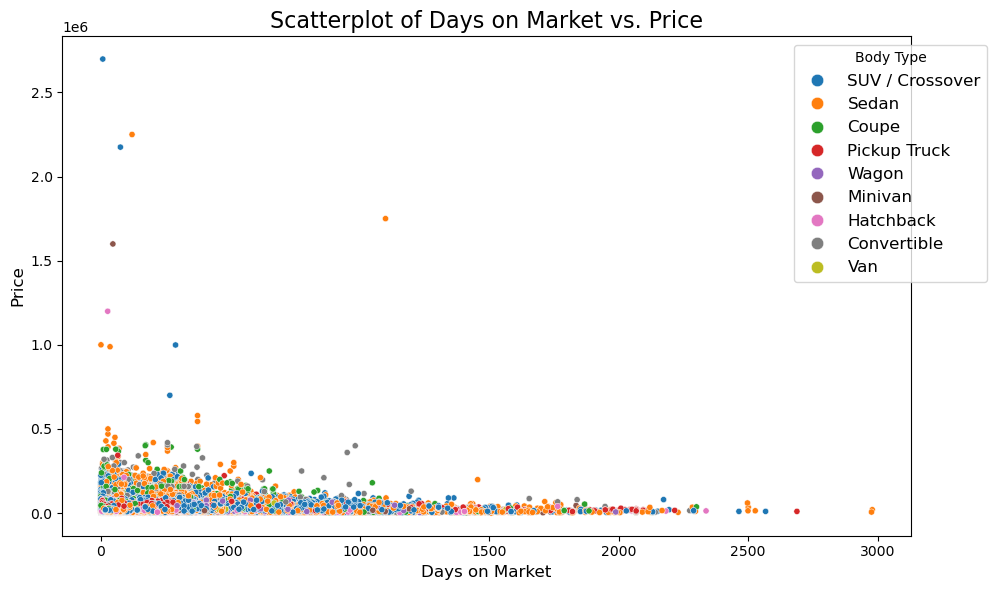

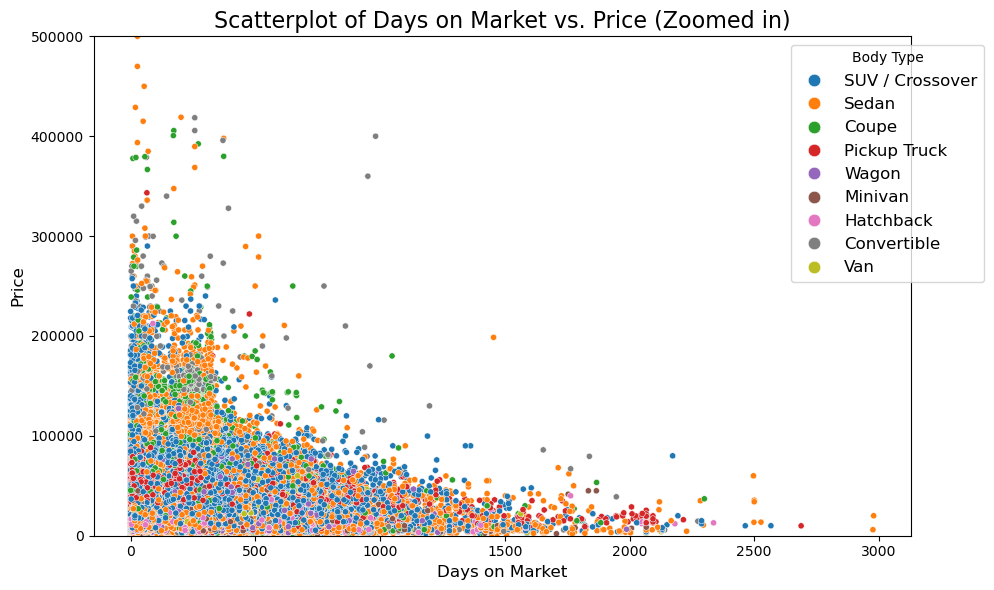

In [45]:
import seaborn as sns
# Ensure tqdm works with pandas apply
tqdm.pandas()

# Identify all columns starting with 'body_'
body_columns = [col for col in cleaned_df2.columns if col.startswith('body_')]

# Create a new column 'body_color' that will store the color for each point
def assign_color(row):
    # Check which 'body_' column has a True value and assign the column name as the color
    for col in body_columns:
        if row[col] == True:
            return col  # Use the column name as the color
    return 'gray'  # Default color for rows with no True values

# Apply the function to create the 'body_color' column with a progress bar
cleaned_df2['body_color'] = cleaned_df2.progress_apply(assign_color, axis=1)

# Create the first scatterplot (entire range)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='daysonmarket', y='price', data=cleaned_df2, hue='body_color', palette='tab10', legend='full', s=20)  # Adjusted size with s=20

# Set the title and labels for the first plot
plt.title('Scatterplot of Days on Market vs. Price', fontsize=16)
plt.xlabel('Days on Market', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()
# Update the legend labels to show in the desired format
new_labels = [label.replace('body_type_', '') for label in labels]

# Increase the size of the legend markers
plt.legend(handles=handles, labels=new_labels, title='Body Type', loc='upper right', bbox_to_anchor=(1.1, 1), fontsize=12, markerscale=2)

# Show the first plot
plt.tight_layout()
plt.show()

# Create the second scatterplot (zoomed-in on price)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='daysonmarket', y='price', data=cleaned_df2, hue='body_color', palette='tab10', legend='full', s=20)  # Adjusted size with s=20

# Set the title and labels for the second plot
plt.title('Scatterplot of Days on Market vs. Price (Zoomed in)', fontsize=16)
plt.xlabel('Days on Market', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Zoom into the price axis (limit to 500,000)
plt.ylim(0, 500000)

# Customize the legend again
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [label.replace('body_type_', '') for label in labels]

# Increase the size of the legend markers
plt.legend(handles=handles, labels=new_labels, title='Body Type', loc='upper right', bbox_to_anchor=(1.1, 1), fontsize=12, markerscale=2)

# Show the second plot
plt.tight_layout()
plt.show()


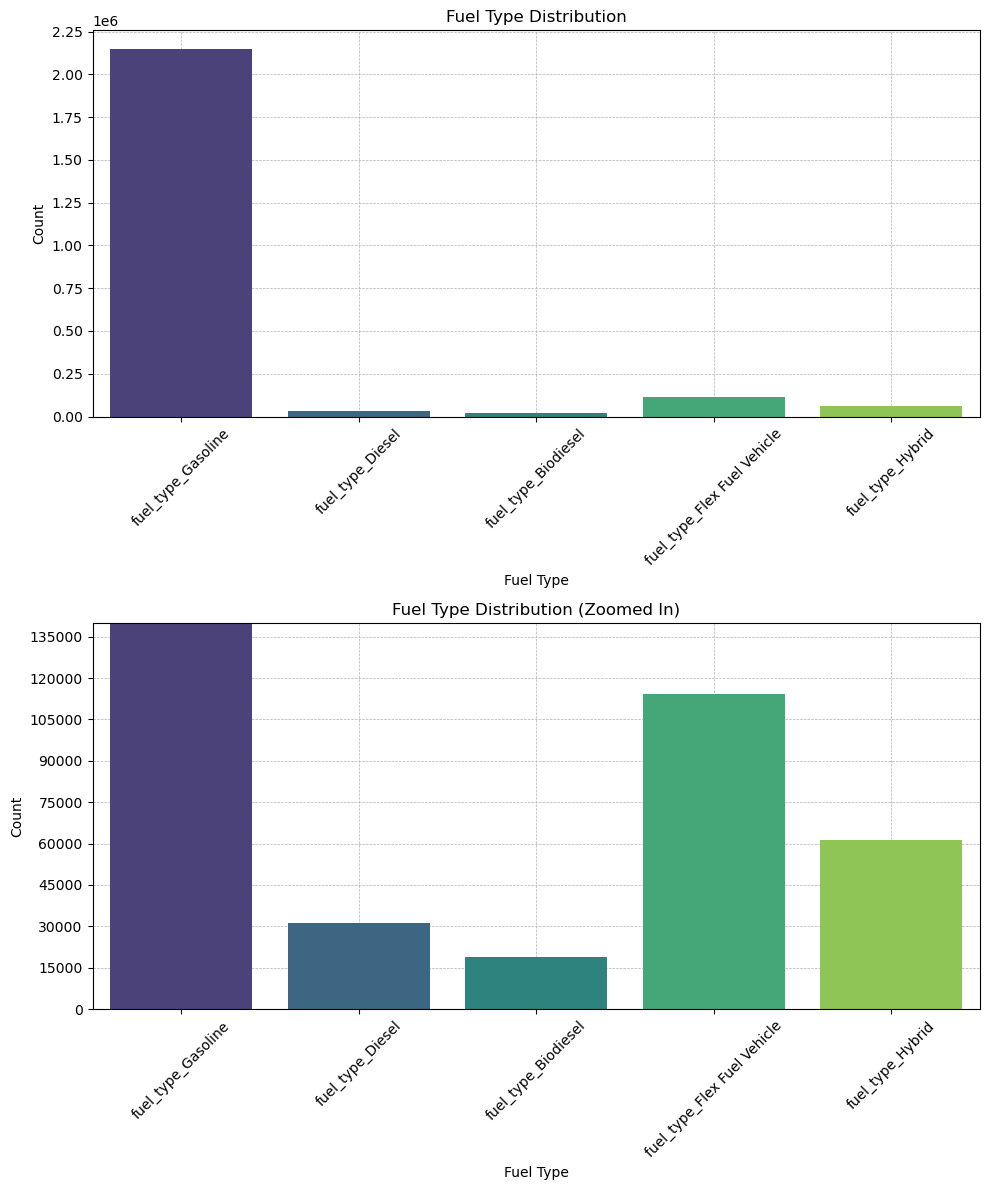

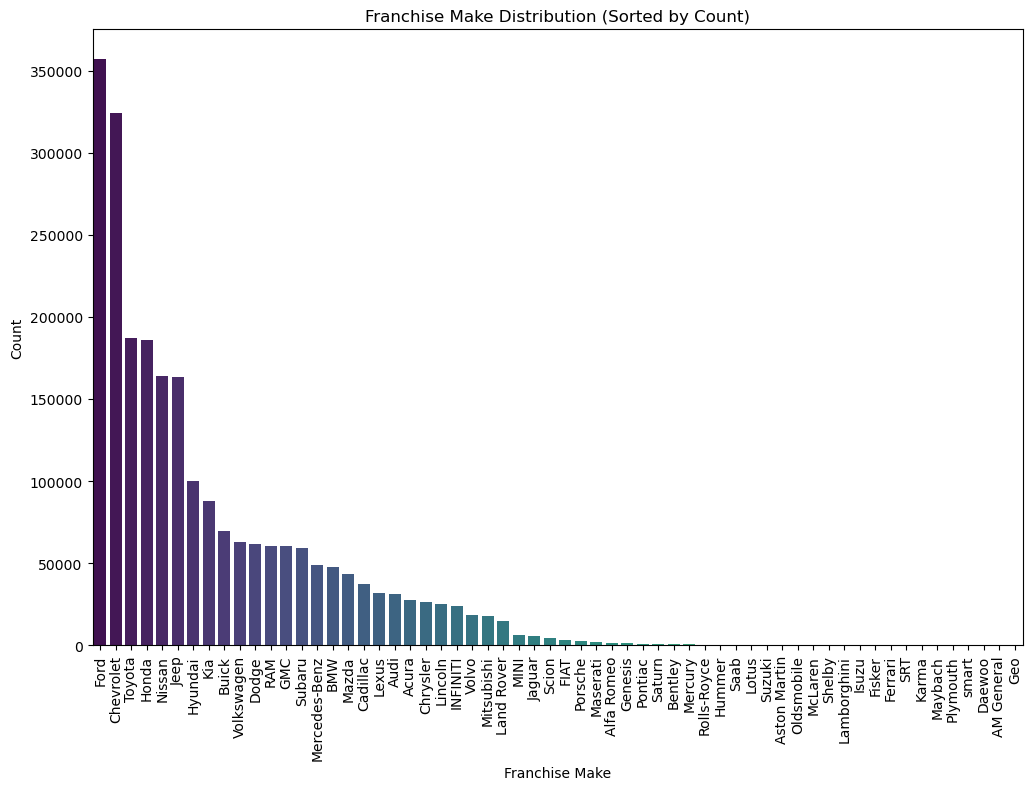

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# fuel_type_columns after one-hot encoding
fuel_type_columns = ['fuel_type_Biodiesel', 'fuel_type_Diesel', 'fuel_type_Flex Fuel Vehicle', 'fuel_type_Gasoline', 'fuel_type_Hybrid']

# Create new 'fuel_type' column, tells fueltype
cleaned_df2['fuel_type'] = cleaned_df2[fuel_type_columns].idxmax(axis=1)

# Create a 2x1 grid for the subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot the full distribution of fuel types
sns.countplot(x='fuel_type', data=cleaned_df2, palette='viridis', ax=axes[0], zorder=2)
axes[0].set_title('Fuel Type Distribution')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

# Plot the zoomed-in distribution (up to 200,000)
sns.countplot(x='fuel_type', data=cleaned_df2, palette='viridis', ax=axes[1], zorder=2)
axes[1].set_title('Fuel Type Distribution (Zoomed In)')
axes[1].set_xlabel('Fuel Type')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
# Set the y-axis limit for zoom
axes[1].set_ylim(0, 140000)
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)


plt.tight_layout()
plt.show()

# Get sorted value counts for franchise_make
sorted_make_counts = cleaned_df2['franchise_make'].value_counts().sort_values(ascending=False)

# Plot sorted distribution of franchise makes
plt.figure(figsize=(12, 8))
sns.countplot(x='franchise_make', data=cleaned_df2, order=sorted_make_counts.index, palette='viridis')
plt.title('Franchise Make Distribution (Sorted by Count)')
plt.xlabel('Franchise Make')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()

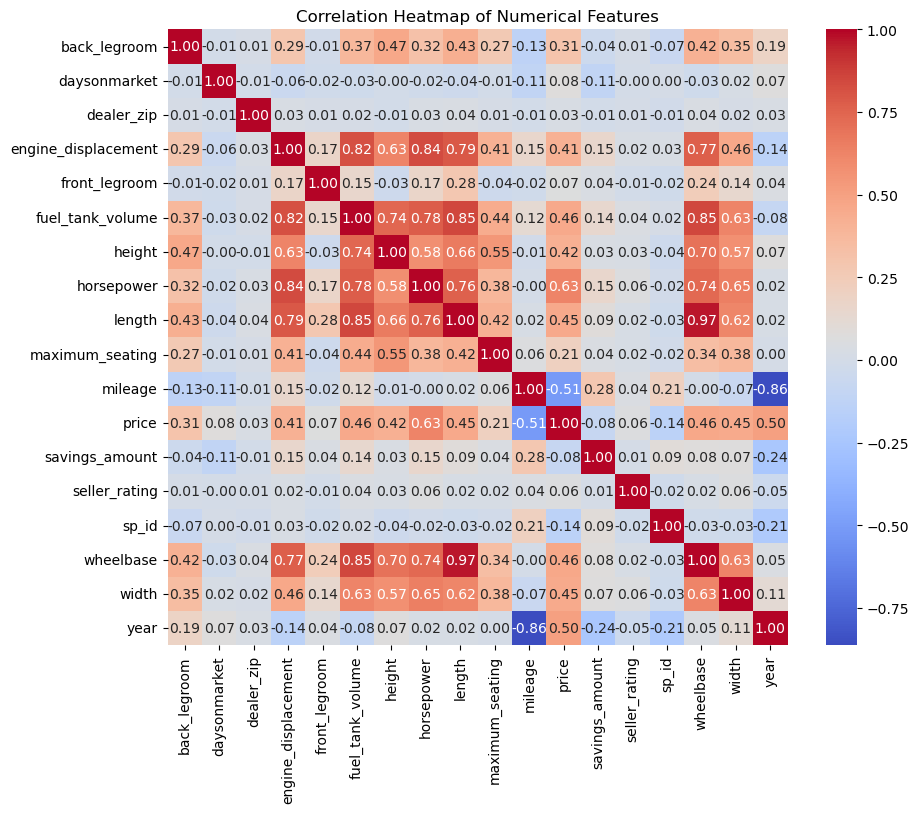

In [47]:
# Select numerical features for correlation heatmap
#numerical_columns = cleaned_df2.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in cleaned_df2.select_dtypes(include=['float64', 'int64']).columns if not col.startswith('major_options')]
corr_matrix = cleaned_df2[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [48]:
from collections import defaultdict
boolean_columns = cleaned_df2.dtypes == 'bool'
bool_columns_list = cleaned_df2.columns[boolean_columns].tolist()

grouped_columns = defaultdict(list)
for col in bool_columns_list:
    prefix = col.split('_')[0]  # Extract prefix (substring before the first '_')
    grouped_columns[prefix].append(col)

# Convert defaultdict to a regular dictionary for easier reading
grouped_columns = dict(grouped_columns)

# Display the grouped columns
for group, items in grouped_columns.items():
    print(f"{group}: {items}")

fleet: ['fleet']
frame: ['frame_damaged']
franchise: ['franchise_dealer']
has: ['has_accidents']
isCab: ['isCab']
is: ['is_new']
salvage: ['salvage']
theft: ['theft_title']
fuel: ['fuel_type_Biodiesel', 'fuel_type_Compressed Natural Gas', 'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Flex Fuel Vehicle', 'fuel_type_Gasoline', 'fuel_type_Hybrid', 'fuel_type_Propane']
wheel: ['wheel_4X2', 'wheel_All-Wheel Drive', 'wheel_Four-Wheel Drive', 'wheel_Front-Wheel Drive', 'wheel_Rear-Wheel Drive']
transmission: ['transmission_A', 'transmission_CVT', 'transmission_Dual Clutch', 'transmission_M']
body: ['body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan', 'body_type_Pickup Truck', 'body_type_SUV / Crossover', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon']
listing: ['listing_color_black, unknown', 'listing_color_purple, pink, teal', 'listing_color_red, blue, green, brown', 'listing_color_white, gray, silver', 'listing_color_yellow, orange, gold']


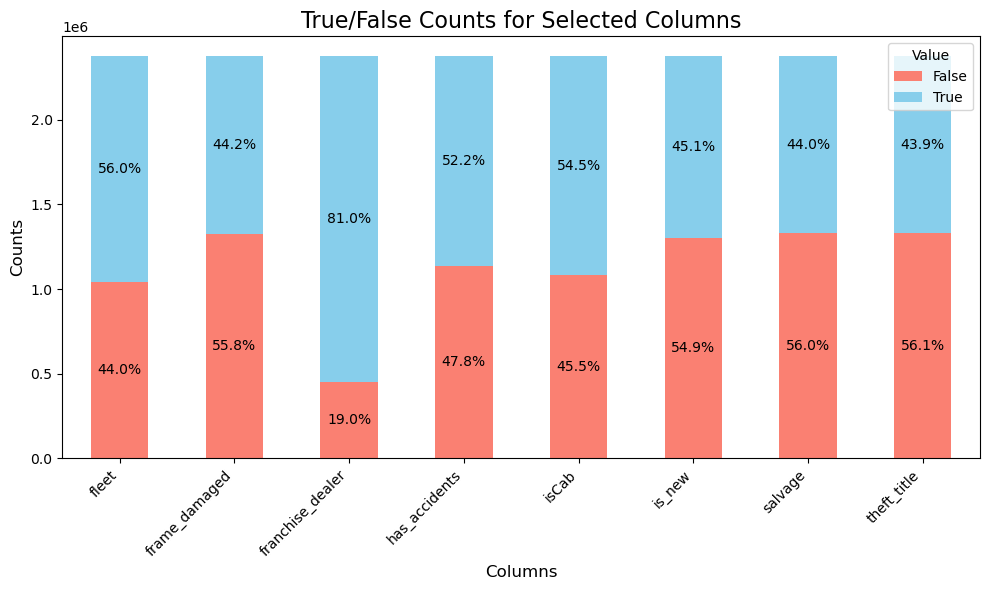

In [49]:
# Define the specific columns
columns = ['fleet', 'frame_damaged', 'franchise_dealer', 'has_accidents', 'isCab', 'is_new', 'salvage', 'theft_title']

# Count True and False values for each column
counts = cleaned_df2[columns].apply(pd.Series.value_counts).fillna(0).astype(int)

# Transpose the counts DataFrame for better plotting (columns become True/False, and indices are the specific column names)
counts = counts.T  # This makes the rows as columns and columns as values

# Plotting the stacked bar chart
ax = counts.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(10, 6))

# Customize the plot
plt.title('True/False Counts for Selected Columns', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Value', labels=['False', 'True'])

# Display percentages on top of the bars
for i, p in enumerate(ax.patches):
    # Get the total count for each column (True + False)
    total = counts.iloc[i // 2].sum()  # Each column has two bars (True, False), so divide by 2 to get the correct row index
    height = p.get_height()
    
    # Calculate the percentage
    percentage = (height / total) * 100
    
    # Calculate the x-position for each bar and display the percentage text
    x_position = p.get_x() + p.get_width() / 2
    y_position = p.get_y() + height / 2  # Place text in the middle of the bar
    
    ax.text(
        x_position, y_position, f'{percentage:.1f}%', ha='center', va='center', fontsize=10, color='black'
    )

plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


In [50]:
# Count the number of True and False values in the 'fleet' column
true_count_fleet = cleaned_df2['fleet'].value_counts().get(True, 0)
false_count_fleet = cleaned_df2['fleet'].value_counts().get(False, 0)

print(f"Number of True values in 'fleet': {true_count_fleet}")
print(f"Number of False values in 'fleet': {false_count_fleet}")

Number of True values in 'fleet': 1330913
Number of False values in 'fleet': 1044023


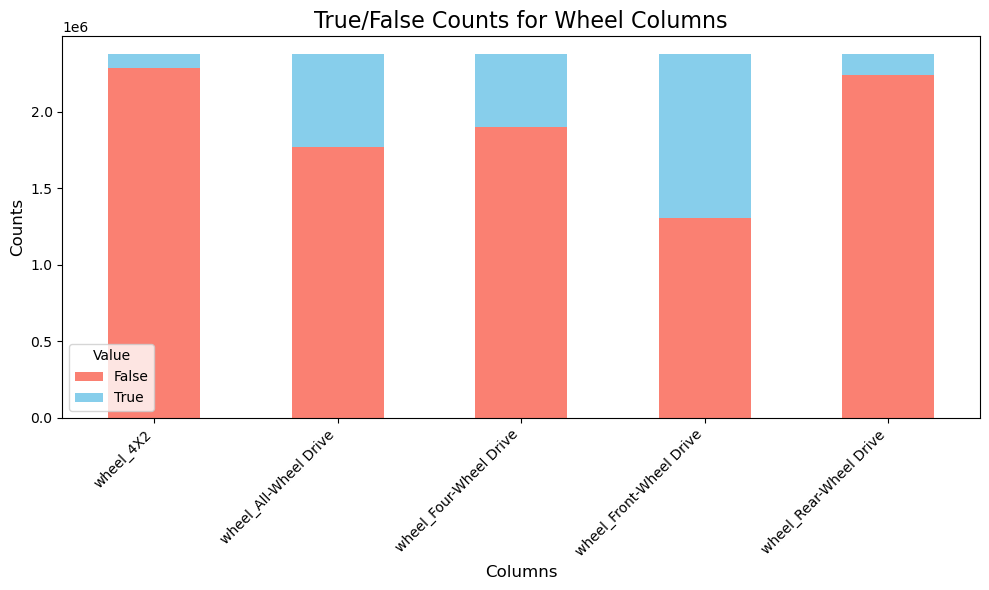

In [51]:
# Filter columns that start with 'wheel'
wheel_columns = [col for col in cleaned_df2.columns if col.startswith('wheel_')]

# Count True and False values for each column
counts = cleaned_df2[wheel_columns].apply(pd.Series.value_counts).fillna(0).astype(int)

# Transpose the counts DataFrame for better plotting
counts = counts.T  # Columns become 'True' and 'False', and indices are 'wheel_*'

# Plotting the stacked bar chart
counts.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(10, 6))

# Customize the plot
plt.title('True/False Counts for Wheel Columns', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Value', labels=['False', 'True'])
plt.tight_layout()  # Adjust layout to fit all elements

# Show the plot
plt.show()

Processing group: Wheel Columns
True counts for Wheel Columns: wheel_4X2                    89656
wheel_All-Wheel Drive       602926
wheel_Four-Wheel Drive      476628
wheel_Front-Wheel Drive    1069999
wheel_Rear-Wheel Drive      135727
dtype: int64


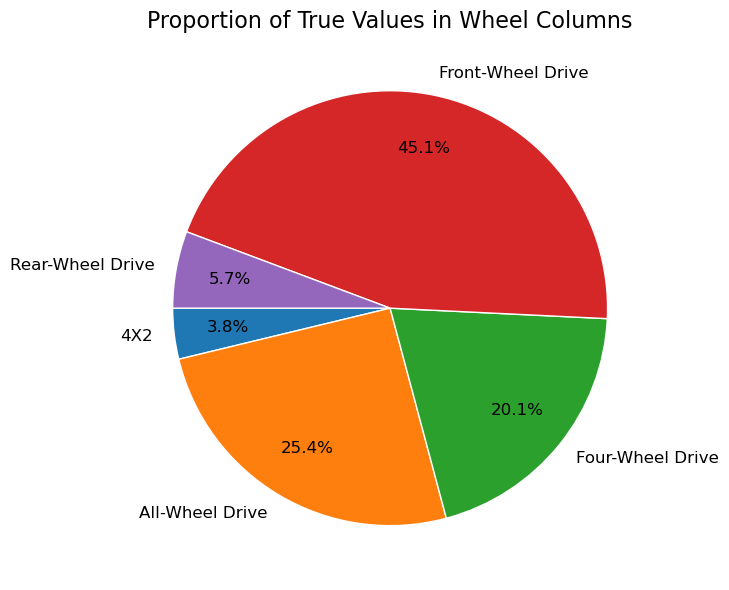

Completed group: Wheel Columns
Processing group: Transmission Columns
True counts for Transmission Columns: transmission_A      1936594
transmission_CVT     394534
Other                 43808
dtype: int64


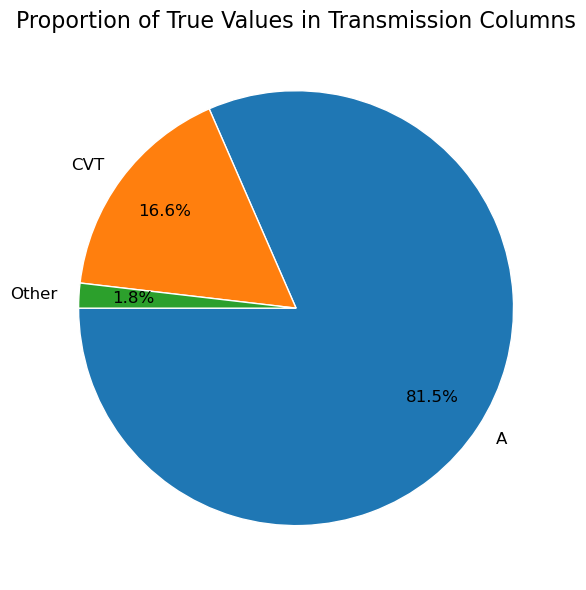

Completed group: Transmission Columns
Processing group: Body Type Columns
True counts for Body Type Columns: body_type_Pickup Truck        334640
body_type_SUV / Crossover    1180129
body_type_Sedan               626200
Other                         233967
dtype: int64


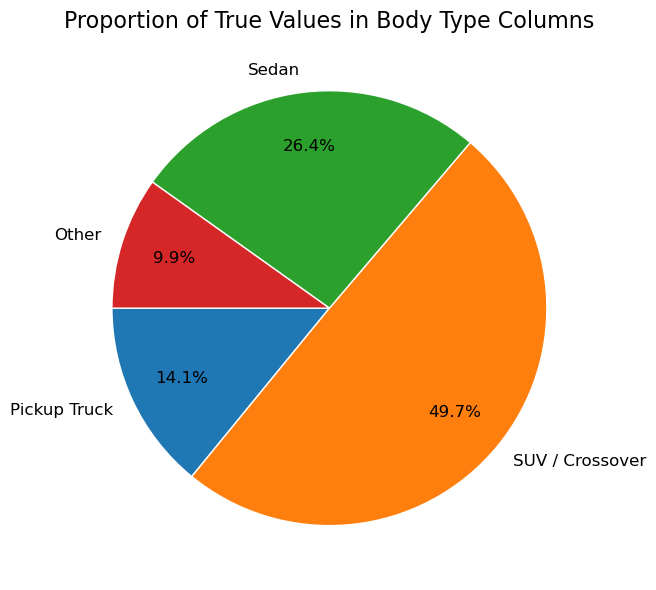

Completed group: Body Type Columns
Processing group: Listing Color Columns
True counts for Listing Color Columns: listing_color_black, unknown              790541
listing_color_red, blue, green, brown     437766
listing_color_white, gray, silver        1121182
Other                                      25447
dtype: int64


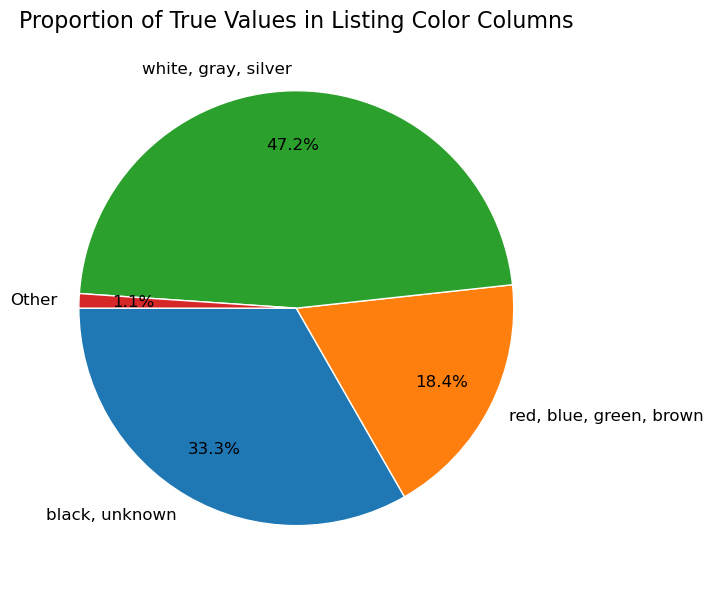

Completed group: Listing Color Columns
Processing group: Major Options Columns
True counts for Major Options Columns: major_options_Backup Camera              1873697
major_options_Bluetooth                  1672365
major_options_Alloy Wheels               1583293
major_options_Heated Seats               1046817
major_options_Navigation System           885312
major_options_Sunroof/Moonroof            814719
major_options_Remote Start                811304
major_options_CarPlay                     730841
major_options_Leather Seats               689369
major_options_Blind Spot Monitoring       672490
major_options_Android Auto                652580
major_options_Parking Sensors             445629
major_options_Adaptive Cruise Control     412071
major_options_Other Option               1311906
dtype: int64


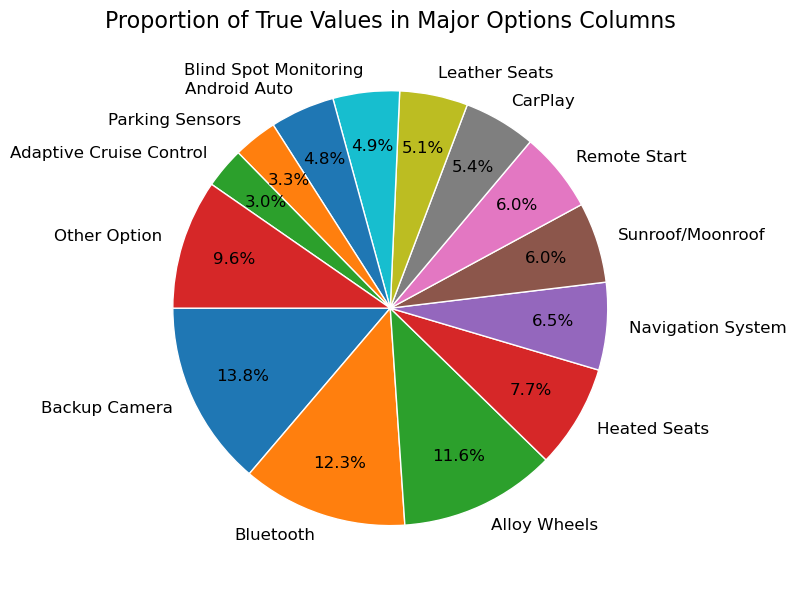

Completed group: Major Options Columns
All groups processed.


In [52]:

# Function to process data and group small percentages into 'Other'
def process_data_for_pie(true_counts):
    total = true_counts.sum()
    percentages = (true_counts / total) * 100
    small_values = percentages < 3  # Threshold for small percentages
    if small_values.any():
        other_value = true_counts[small_values].sum()
        true_counts = true_counts[~small_values]
        true_counts['Other'] = other_value
    return true_counts

# Define prefixes for each group
groups = {
    'wheel_': 'Wheel Columns',
    'transmission_': 'Transmission Columns',
    'body_type_': 'Body Type Columns',
    'listing_color_': 'Listing Color Columns',
    'major_options_': 'Major Options Columns'
}

# Loop through each group and create pie charts
for prefix, title in groups.items():
    print(f"Processing group: {title}")
    
    # Filter columns that start with the prefix
    group_columns = [col for col in cleaned_df2.columns if col.startswith(prefix)]
    
    if not group_columns:
        print(f"No columns found for prefix: {prefix}")
        continue
    
    # Count the True values for each column
    true_counts = cleaned_df2[group_columns].sum()
    
    # Process data for pie chart (combine small percentages into "Other")
    true_counts = process_data_for_pie(true_counts)
    
    print(f"True counts for {title}: {true_counts}")
    
    plt.figure(figsize=(8, 6))
    plt.pie(
        true_counts, 
        labels=true_counts.index.str.replace(prefix, ''), 
        autopct='%1.1f%%', 
        startangle=180, 
        colors=plt.cm.tab10.colors[:len(true_counts)],
        textprops={'fontsize': 12},
        pctdistance=0.75,  # Adjust percentage text to be closer to the center
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    )
    plt.title(f'Proportion of True Values in {title}', fontsize=16)
    plt.tight_layout()
    plt.show()
    print(f"Completed group: {title}")

print("All groups processed.")


# Label Encoding

Enkoodataan kategoriset muuttujat numeerisiksi arvoiksi, jotta voidaan viedä myöhemmin käytettävälle koneoppimismallille. Tämä tehdään sarakkeille, joissa oli liian paljon uniikkeja kategorisia muuttujia, jotta one-hot enkoodausta olisi voitu käyttää.

Tehdään sarakkeille:
- fuel_type
- make
- city
- model



In [53]:
from sklearn.preprocessing import LabelEncoder

fuel_type_encoder = LabelEncoder()
make_encoder = LabelEncoder()
city_encoder = LabelEncoder()
model_encoder = LabelEncoder()

#enkoodataan, niin monta saraketta
cleaned_df2['fuel_type_encoded'] = city_encoder.fit_transform(cleaned_df2['fuel_type'])
cleaned_df2['make_encoded'] = make_encoder.fit_transform(cleaned_df2['franchise_make'])
cleaned_df2['city_encoded'] = city_encoder.fit_transform(cleaned_df2['city'])
cleaned_df2['model_encoded'] = model_encoder.fit_transform(cleaned_df2['model_name'])

### Encoding "major_options" -sarakkeelle

- Tämä toisena vaihtoehtona aiemmin tehtyyn one-hot encodingiin

In [54]:
dataframe.columns
print(dataframe["major_options"].sample(20))
print(dataframe["major_options"].nunique())

16110      ['Sunroof/Moonroof', 'Navigation System', 'All...
2815796              ['Navigation System', 'Premium Wheels']
1176321    ['Sunroof/Moonroof', 'Navigation System', 'Chr...
327636     ['Alloy Wheels', 'Bluetooth', 'Backup Camera',...
1734111    ['Navigation System', 'Adaptive Cruise Control...
294113     ['Alloy Wheels', 'Bluetooth', 'Backup Camera',...
2844444    ['Sunroof/Moonroof', 'Alloy Wheels', 'Third Ro...
265457                                                   NaN
814254                                                   NaN
2010271    ['Navigation System', 'Adaptive Cruise Control...
2616308                        ['Alloy Wheels', 'Bluetooth']
1197803                        ['Steel Wheels', 'Bluetooth']
2484588    ['Driver Confidence Package', 'Power Package',...
1109742    ['Power Package', 'Navigation System', 'Alloy ...
2315303    ['Third Row Seating', 'Backup Camera', 'Remote...
1830722    ['Alloy Wheels', 'Preferred Package', 'Backup ...
1740974    ['Sunroof/Moo

In [55]:
import pandas as pd
import ast

# Muutetaan sarakkeen merkkijonot listaksi (jos tarpeen)
dataframe["major_options"] = dataframe["major_options"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Luodaan numeerinen koodaus jokaiselle varusteelle
all_options = sorted(set(option for sublist in dataframe["major_options"].dropna() for option in sublist))
option_to_id = {option: idx for idx, option in enumerate(all_options)}

# Korvataan varusteet numeerisilla koodeilla
dataframe["encoded_options"] = dataframe["major_options"].apply(
    lambda x: [option_to_id[option] for option in x] if isinstance(x, list) else []
)

print(dataframe["encoded_options"].sample(20))


855444                                  [16, 26, 23, 99, 52]
1512874                               [123, 16, 127, 25, 52]
2362587                                            [23, 135]
1018320                [123, 72, 16, 26, 23, 99, 25, 30, 52]
165039          [41, 16, 26, 23, 99, 25, 77, 52, 18, 28, 35]
1583120                                                   []
1991175                                                 [23]
1919636                                             [60, 16]
709553              [72, 12, 16, 26, 23, 99, 25, 77, 18, 28]
2536146               [123, 127, 26, 23, 99, 25, 52, 18, 28]
712784                                                    []
1591645                                         [60, 26, 23]
1478048                                                   []
884697                 [60, 72, 16, 127, 26, 23, 99, 52, 95]
790959                                                  [16]
2681550                     [72, 12, 16, 23, 99, 77, 18, 28]
3796                    

# Mallille vietavien sarakkeiden viimeistelyt

- Poistetaan vielä "make_name" -sarake sillä sisältää vähemmän tietoja kuin "franchise_make"

In [56]:
print(len(cleaned_df2['franchise_make'].unique()))
print(len(cleaned_df2['make_name'].unique()))
list1 = cleaned_df2['franchise_make'].unique()
list2 = cleaned_df2['make_name'].unique()

unique_to_list1 = set(list1) - set(list2)
print(unique_to_list1)

60
53
{'McLaren', 'Shelby', 'Lamborghini', 'Lotus', 'smart', 'Ferrari', 'SRT'}


- Sarakkeet, jotka jätetään pois mallintamisen vaiheessa 
- Tekstipohjaiset visuaalisaation jälkeen poistettava

Poistettavat sarakkeet:
- listing_color
- make_name
- fuel_type
- franchise_make
- city
- model_name

Nämä on enkoodattu, joten nyt poistetaan vain alkuperäiset sarakkeet

In [57]:
pudotettavat = ['listing_color', 'make_name', 'body_color']
enkoodatut = ['fuel_type', 'franchise_make', 'city', 'model_name'] #jatkon kannalta talteen

cleaned_df2.drop(columns=pudotettavat, inplace=True)
cleaned_df2.drop(columns=enkoodatut, inplace=True)

final_df = cleaned_df2
final_df.head(2)

,back_legroom,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,maximum_seating,mileage,price,salvage,savings_amount,seller_rating,sp_id,theft_title,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Compressed Natural Gas,fuel_type_Diesel,fuel_type_Electric,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Propane,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,"listing_color_black, unknown","listing_color_purple, pink, teal","listing_color_red, blue, green, brown","listing_color_white, gray, silver","listing_color_yellow, orange, gold",major_options_Backup Camera,major_options_Bluetooth,major_options_Alloy Wheels,major_options_Heated Seats,major_options_Navigation System,major_options_Sunroof/Moonroof,major_options_Remote Start,major_options_CarPlay,major_options_Leather Seats,major_options_Blind Spot Monitoring,major_options_Android Auto,major_options_Parking Sensors,major_options_Adaptive Cruise Control,major_options_Other Option,fuel_type_encoded,make_encoded,city_encoded,model_encoded
0,35.1,522,960.0,1300.0,True,True,True,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,5.0,7.0,23141.0,True,0,2.8,370599.0,True,101.2,79.6,2019,2019,4,5,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,26,231,648
1,38.1,207,922.0,2000.0,True,True,True,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,7.0,8.0,46500.0,True,0,3.0,389227.0,True,107.9,85.6,2020,2020,2,5,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,30,3471,230


## Boolean-sarakkeet int:ksi

- Muunnetaan boolean-tyyppiset sarakkeet 0/1 muotoon True/False sijaan koko datasetissä

In [58]:
# Valitaan bool-sarakkeet
bool_columns = final_df.select_dtypes(include=["bool"]).columns

# Muunnetaan 0/1 muotoon
final_df[bool_columns] = final_df[bool_columns].astype(int)

final_df[bool_columns].head()


,fleet,frame_damaged,franchise_dealer,has_accidents,isCab,is_new,salvage,theft_title,fuel_type_Biodiesel,fuel_type_Compressed Natural Gas,fuel_type_Diesel,fuel_type_Electric,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Propane,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,"listing_color_black, unknown","listing_color_purple, pink, teal","listing_color_red, blue, green, brown","listing_color_white, gray, silver","listing_color_yellow, orange, gold"
0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
6,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [59]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2374936 entries, 0 to 3000039
Data columns (total 79 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   back_legroom                           float64       
 1   daysonmarket                           int64         
 2   dealer_zip                             float64       
 3   engine_displacement                    float64       
 4   fleet                                  int32         
 5   frame_damaged                          int32         
 6   franchise_dealer                       int32         
 7   front_legroom                          float64       
 8   fuel_tank_volume                       float64       
 9   has_accidents                          int32         
 10  height                                 float64       
 11  horsepower                             float64       
 12  isCab                                  int32         
 13  is

### Kuvaaja, jossa lopullinen jakauma tietotyypeistä

- Huomataan, että objekti-tietotyypeistä on päästy kokonaan eroon

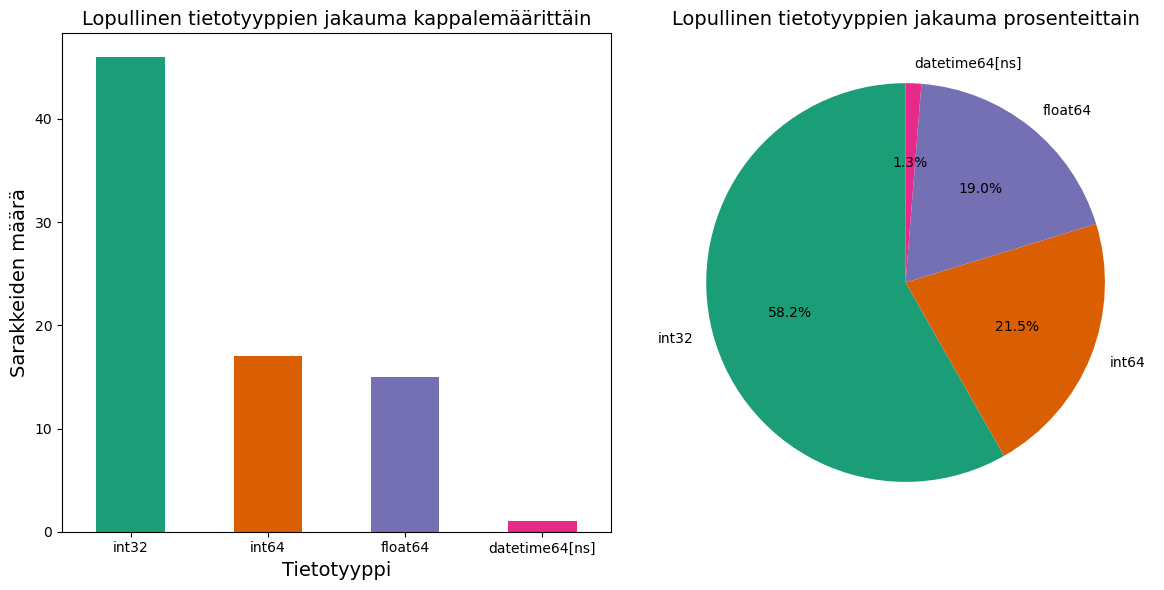

In [60]:
import matplotlib.pyplot as plt

data_types_plot3 = cleaned_df2.dtypes.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Barplot
data_types_plot3.plot(
    kind="bar",
    ax=axes[0],
    color=colors
)

axes[0].tick_params(axis="x", rotation=0)
axes[0].set_title("Lopullinen tietotyyppien jakauma kappalemäärittäin", fontsize=14)
axes[0].set_xlabel("Tietotyyppi", fontsize=14)
axes[0].set_ylabel("Sarakkeiden määrä", fontsize=14)

# Pie
data_types_plot3.plot(
    kind="pie",
    ax=axes[1],
    autopct="%1.1f%%",
    startangle=90,
    ylabel="",
    colors=colors
)

axes[1].set_title("Lopullinen tietotyyppien jakauma prosenteittain", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

## Datan skaalaaminen

- Katsotaan mitä final_df pitää sisällään ennen skaalausta

In [61]:
print(final_df.info())

print(final_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 2374936 entries, 0 to 3000039
Data columns (total 79 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   back_legroom                           float64       
 1   daysonmarket                           int64         
 2   dealer_zip                             float64       
 3   engine_displacement                    float64       
 4   fleet                                  int32         
 5   frame_damaged                          int32         
 6   franchise_dealer                       int32         
 7   front_legroom                          float64       
 8   fuel_tank_volume                       float64       
 9   has_accidents                          int32         
 10  height                                 float64       
 11  horsepower                             float64       
 12  isCab                                  int32         
 13  is

## 1. Skaalaminen riippuu suuresti valittavasta mallintamismetodista

esimerkiksi LabelEncoded arvoja voi käyttää helpommin tree-based malleissa (kuten Random Forest, XGBoost), koska ne osaavat tulkita numeeriset label arvot, eikä suurempi numero vaikuta tuloksiin negatiivisesti.

Milloin LabelEncoder on huono:
Jos käyttää etäisyyteen perustuvia malleja (esim. kNN, SVM, Logistic Regression), jotka käsittelevät koodattuja lukuja järjestyslukuina, mikä saattaa aiheuttaa huonon suorituskyvyn.

## 2. korkea kardinaalisuus(cardinality) 

Strategiat korkean kardinaalisuuden käsittelemiseksi:

esimerkiksi model_encoded ja city_encoded kolumnit pitävät sisällään niin monta unique arvoa, että joudutaan varmaankin testaamaan target encoding esim. price kolumnin kanssa  tai embedding metodia(neuroverkot) Embeddings yhdistävät luokat tiheisiin vektoreihin tavalla, joka nappaa luokkien väliset suhteet.

## 3. valitaan mitä tehdään 

### esim. *

### Model Type                 Recommended Encoding

Tree-based modes----------Use label encoding (okay with high cardinality.

Linear models(LogReg)-----Use one-hot encoding or target encoding.

Distance-based models-----Use one-hot encoding or drop high-cardinality cols.  

Neural networks-----------Use embeddings for high cardinality; one-hot for low.  *low.

## Esimerkkinä Knn tyylinen algo - sen skaalaukset ja setit

In [62]:
# esimerkiksi Knn tyylisen algon skaalaus ja preprosessointi

from sklearn.preprocessing import MinMaxScaler

# skaalataan jatkuvat 0-1 välille minmax scalerin avulla
knn_df = final_df.copy()
numerical_cols = [
    "back_legroom", "daysonmarket", "dealer_zip", "engine_displacement",
    "front_legroom", "fuel_tank_volume", "height", "horsepower",
    "length", "maximum_seating", "mileage", "savings_amount",
    "seller_rating", "sp_id", "wheelbase", "width", "year","listed_year"
]

scaler = MinMaxScaler()
knn_df[numerical_cols] = scaler.fit_transform(knn_df[numerical_cols])





In [63]:
# pudotetaan object tyyppiset kolumnit
object_cols = knn_df.select_dtypes(include=['object']).columns
knn_df = knn_df.drop(columns=object_cols)
# check
num_object_cols = knn_df.select_dtypes(include=['object']).shape[1]
print(f"Number of columns with dtype 'object': {num_object_cols}")

Number of columns with dtype 'object': 0


In [64]:
# drop the label encoded cols for this (not great for disdance based models, as previously discussed) 

columns_to_drop = ["fuel_type_encoded", "make_encoded", "city_encoded", "model_encoded"]

# Drop
knn_df = knn_df.drop(columns=columns_to_drop)

Tästä voidaan siis vielä työstää pidemmälle pudottamalla listed_date col kokonaan. 

Voidaan myös implimentoida cyclical encoding listed_month ja listed_dayofweek kolumneihin, että saadaan parempaa dataa mallille.


In [65]:
import numpy as np

# Drop 'listed_date'
knn_df = knn_df.drop(columns=['listed_date'])

# Apply cyclical encoding for the days and months to better represent their cyclical nature.
knn_df['month_sin'] = np.sin(2 * np.pi * knn_df['listed_month'] / 12)
knn_df['month_cos'] = np.cos(2 * np.pi * knn_df['listed_month'] / 12)
knn_df['day_sin'] = np.sin(2 * np.pi * knn_df['listed_dayofweek'] / 7)
knn_df['day_cos'] = np.cos(2 * np.pi * knn_df['listed_dayofweek'] / 7)

# Drop the original 'listed_month' and 'listed_dayofweek'
knn_df = knn_df.drop(columns=['listed_month', 'listed_dayofweek'])



### Visualisoidaan skaalattu data

Price kolumnia ei tässä tapauksessa skaalata, sillä sitä yritetään ennustaa seuraavassa vaiheessa. 
Tehtiin kuitenkin skaalaus daysonmarket kolumniin hinnan ennustamisen takia. 
Seuraavassa vaiheessa voidaan tulla takaisin tähän ja vaihdella päikseen luokkavariableja. Luodaan myös seuraavaksi myyntikategoria luokkavariable.



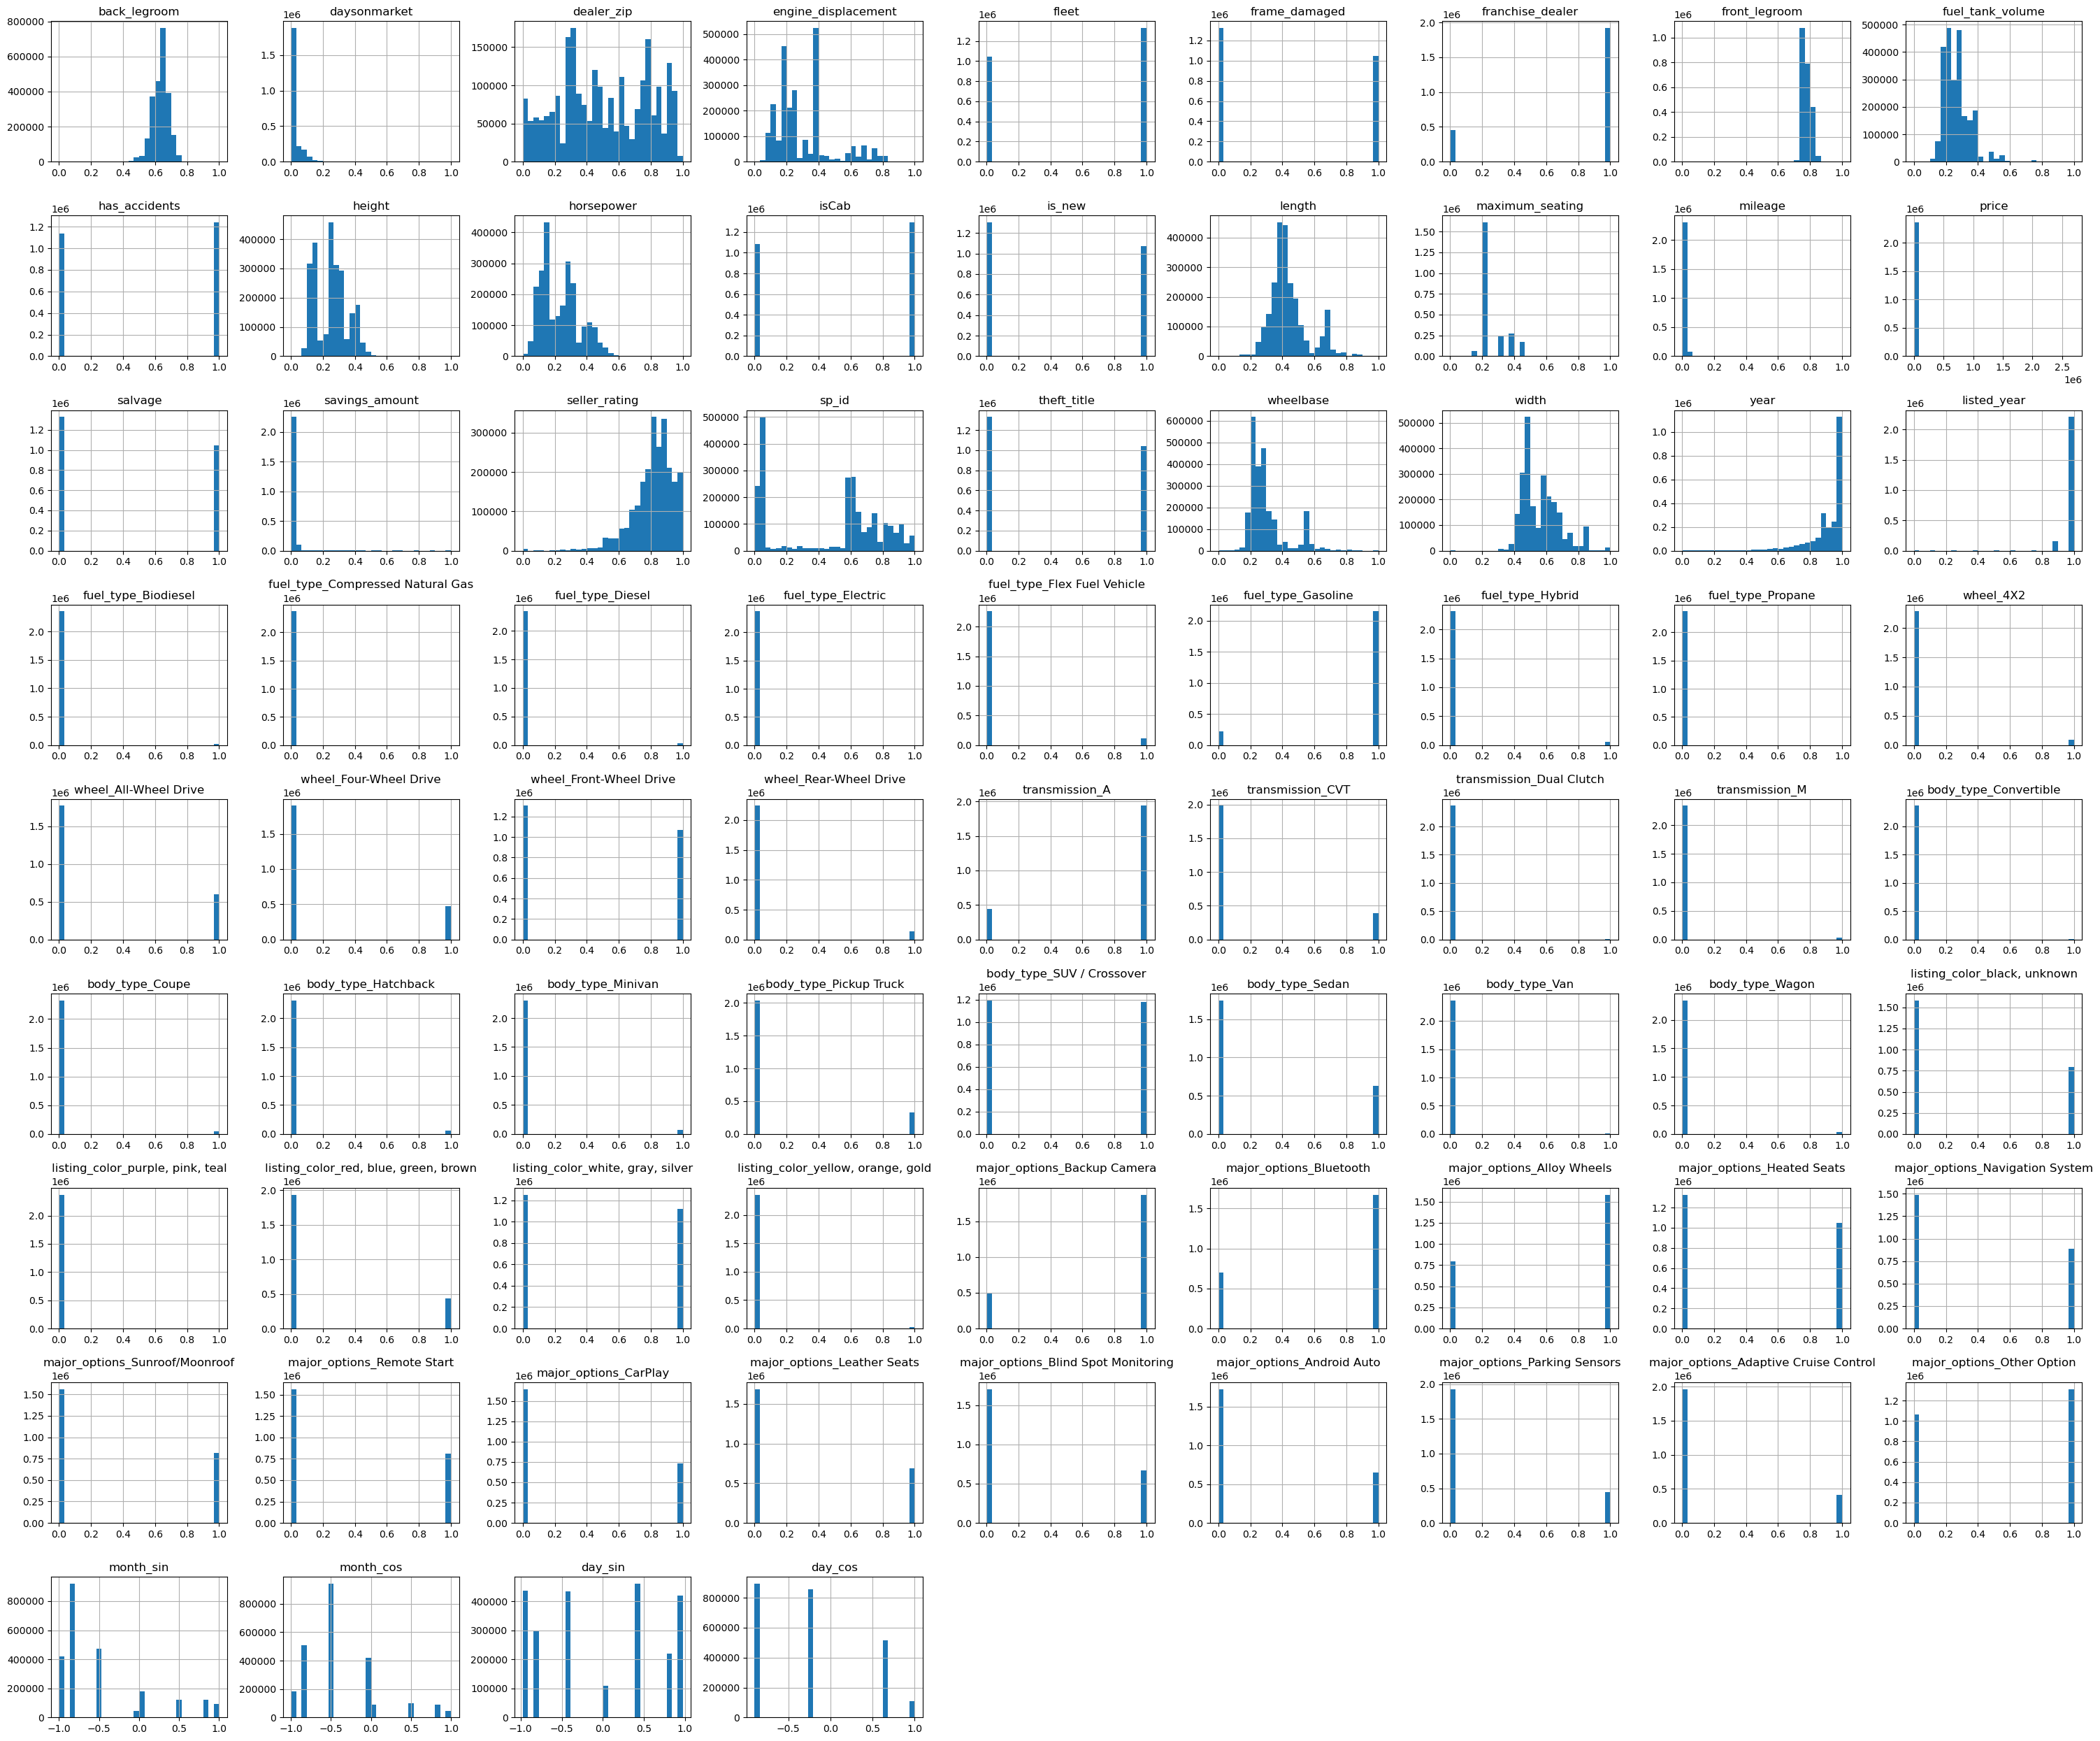

In [66]:
import matplotlib.pyplot as plt

# Plot histograms for each feature
knn_df.hist(bins=30, figsize=(30, 25))
plt.tight_layout()
plt.show()

## Nyt voidaan testata tree-based mallia(kuten Random Forest), testataan toimiiko label encoded setit

##### Nyt ei tarvitse välttämättä skaalata numeerisia kolumneja, one-hot encoded kolumnit voi pitää sellaisinaan ja label encoded kolumit voi pitää mukana

dropattavat kolumnit ovat siis object kolumnit ja raa’at date kolumnit

In [67]:
# nyt työstetään random forest skaalaus ja jako hinnan predcitaamiseen
# ei tarvita edes cylical encoodamista date hommiiin rf mallissa. 

# dropataan object col
rf_df = final_df.copy()
object_cols = rf_df.select_dtypes(include=['object']).columns
rf_df = rf_df.drop(columns=object_cols)

drop_cols = ['listed_date']
rf_df = rf_df.drop(columns=drop_cols)

In [68]:
# koska käytetään label encoding fuel_typeä, niin voi redundant one-hot encodatut kolumnit poistaa. 

redundant_one_hot = ["fuel_type_Biodiesel", "fuel_type_Diesel", 
                     "fuel_type_Flex Fuel Vehicle", "fuel_type_Gasoline", "fuel_type_Hybrid"]
rf_df.drop(columns=redundant_one_hot, inplace=True)

In [69]:
# testataan suoraan vaan näillä seteillä
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# Split data
X = rf_df.drop(columns=['price'])  # Features
y = rf_df['price']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Implimentoidaan deep learning mallille skaalaukset ja myöhemmin phase 4 -> embedding

In [70]:
import tensorflow as tf

In [71]:
tf_df = final_df.copy()
numerical_cols = [
    "back_legroom", "daysonmarket", "dealer_zip", "engine_displacement",
    "front_legroom", "fuel_tank_volume", "height", "horsepower",
    "length", "maximum_seating", "mileage", "savings_amount",
    "seller_rating", "sp_id", "wheelbase", "width", "year","listed_year"
]

scaler = MinMaxScaler()
tf_df[numerical_cols] = scaler.fit_transform(tf_df[numerical_cols])


In [72]:
# voidaan käyttää label encoded representaatiota, joten näitä ei tarvita nyt
fuel_one_hot_cols = [
    "fuel_type_Biodiesel", "fuel_type_Diesel", "fuel_type_Flex Fuel Vehicle",
    "fuel_type_Gasoline", "fuel_type_Hybrid"
]
tf_df = tf_df.drop(columns=fuel_one_hot_cols)



In [73]:
# pudotetaan object tyyppiset kolumnit
object_cols = tf_df.select_dtypes(include=['object']).columns
tf_df = tf_df.drop(columns=object_cols)
# check
num_object_cols = tf_df.select_dtypes(include=['object']).shape[1]
print(f"Number of columns with dtype 'object': {num_object_cols}")


Number of columns with dtype 'object': 0


In [74]:
# cyclical encoding myös tähän paremmin toimittamaan dataa päivistä ja kuukausista
import numpy as np
import pandas as pd

# Extract components from the listed_date column
tf_df['listed_month'] = tf_df['listed_date'].dt.month
tf_df['listed_dayofweek'] = tf_df['listed_date'].dt.dayofweek

# Apply cyclical encoding
tf_df['month_sin'] = np.sin(2 * np.pi * tf_df['listed_month'] / 12)
tf_df['month_cos'] = np.cos(2 * np.pi * tf_df['listed_month'] / 12)

tf_df['day_sin'] = np.sin(2 * np.pi * tf_df['listed_dayofweek'] / 7)
tf_df['day_cos'] = np.cos(2 * np.pi * tf_df['listed_dayofweek'] / 7)

# Drop the original and intermediate columns
tf_df.drop(columns=['listed_date', 'listed_month', 'listed_dayofweek'], inplace=True)

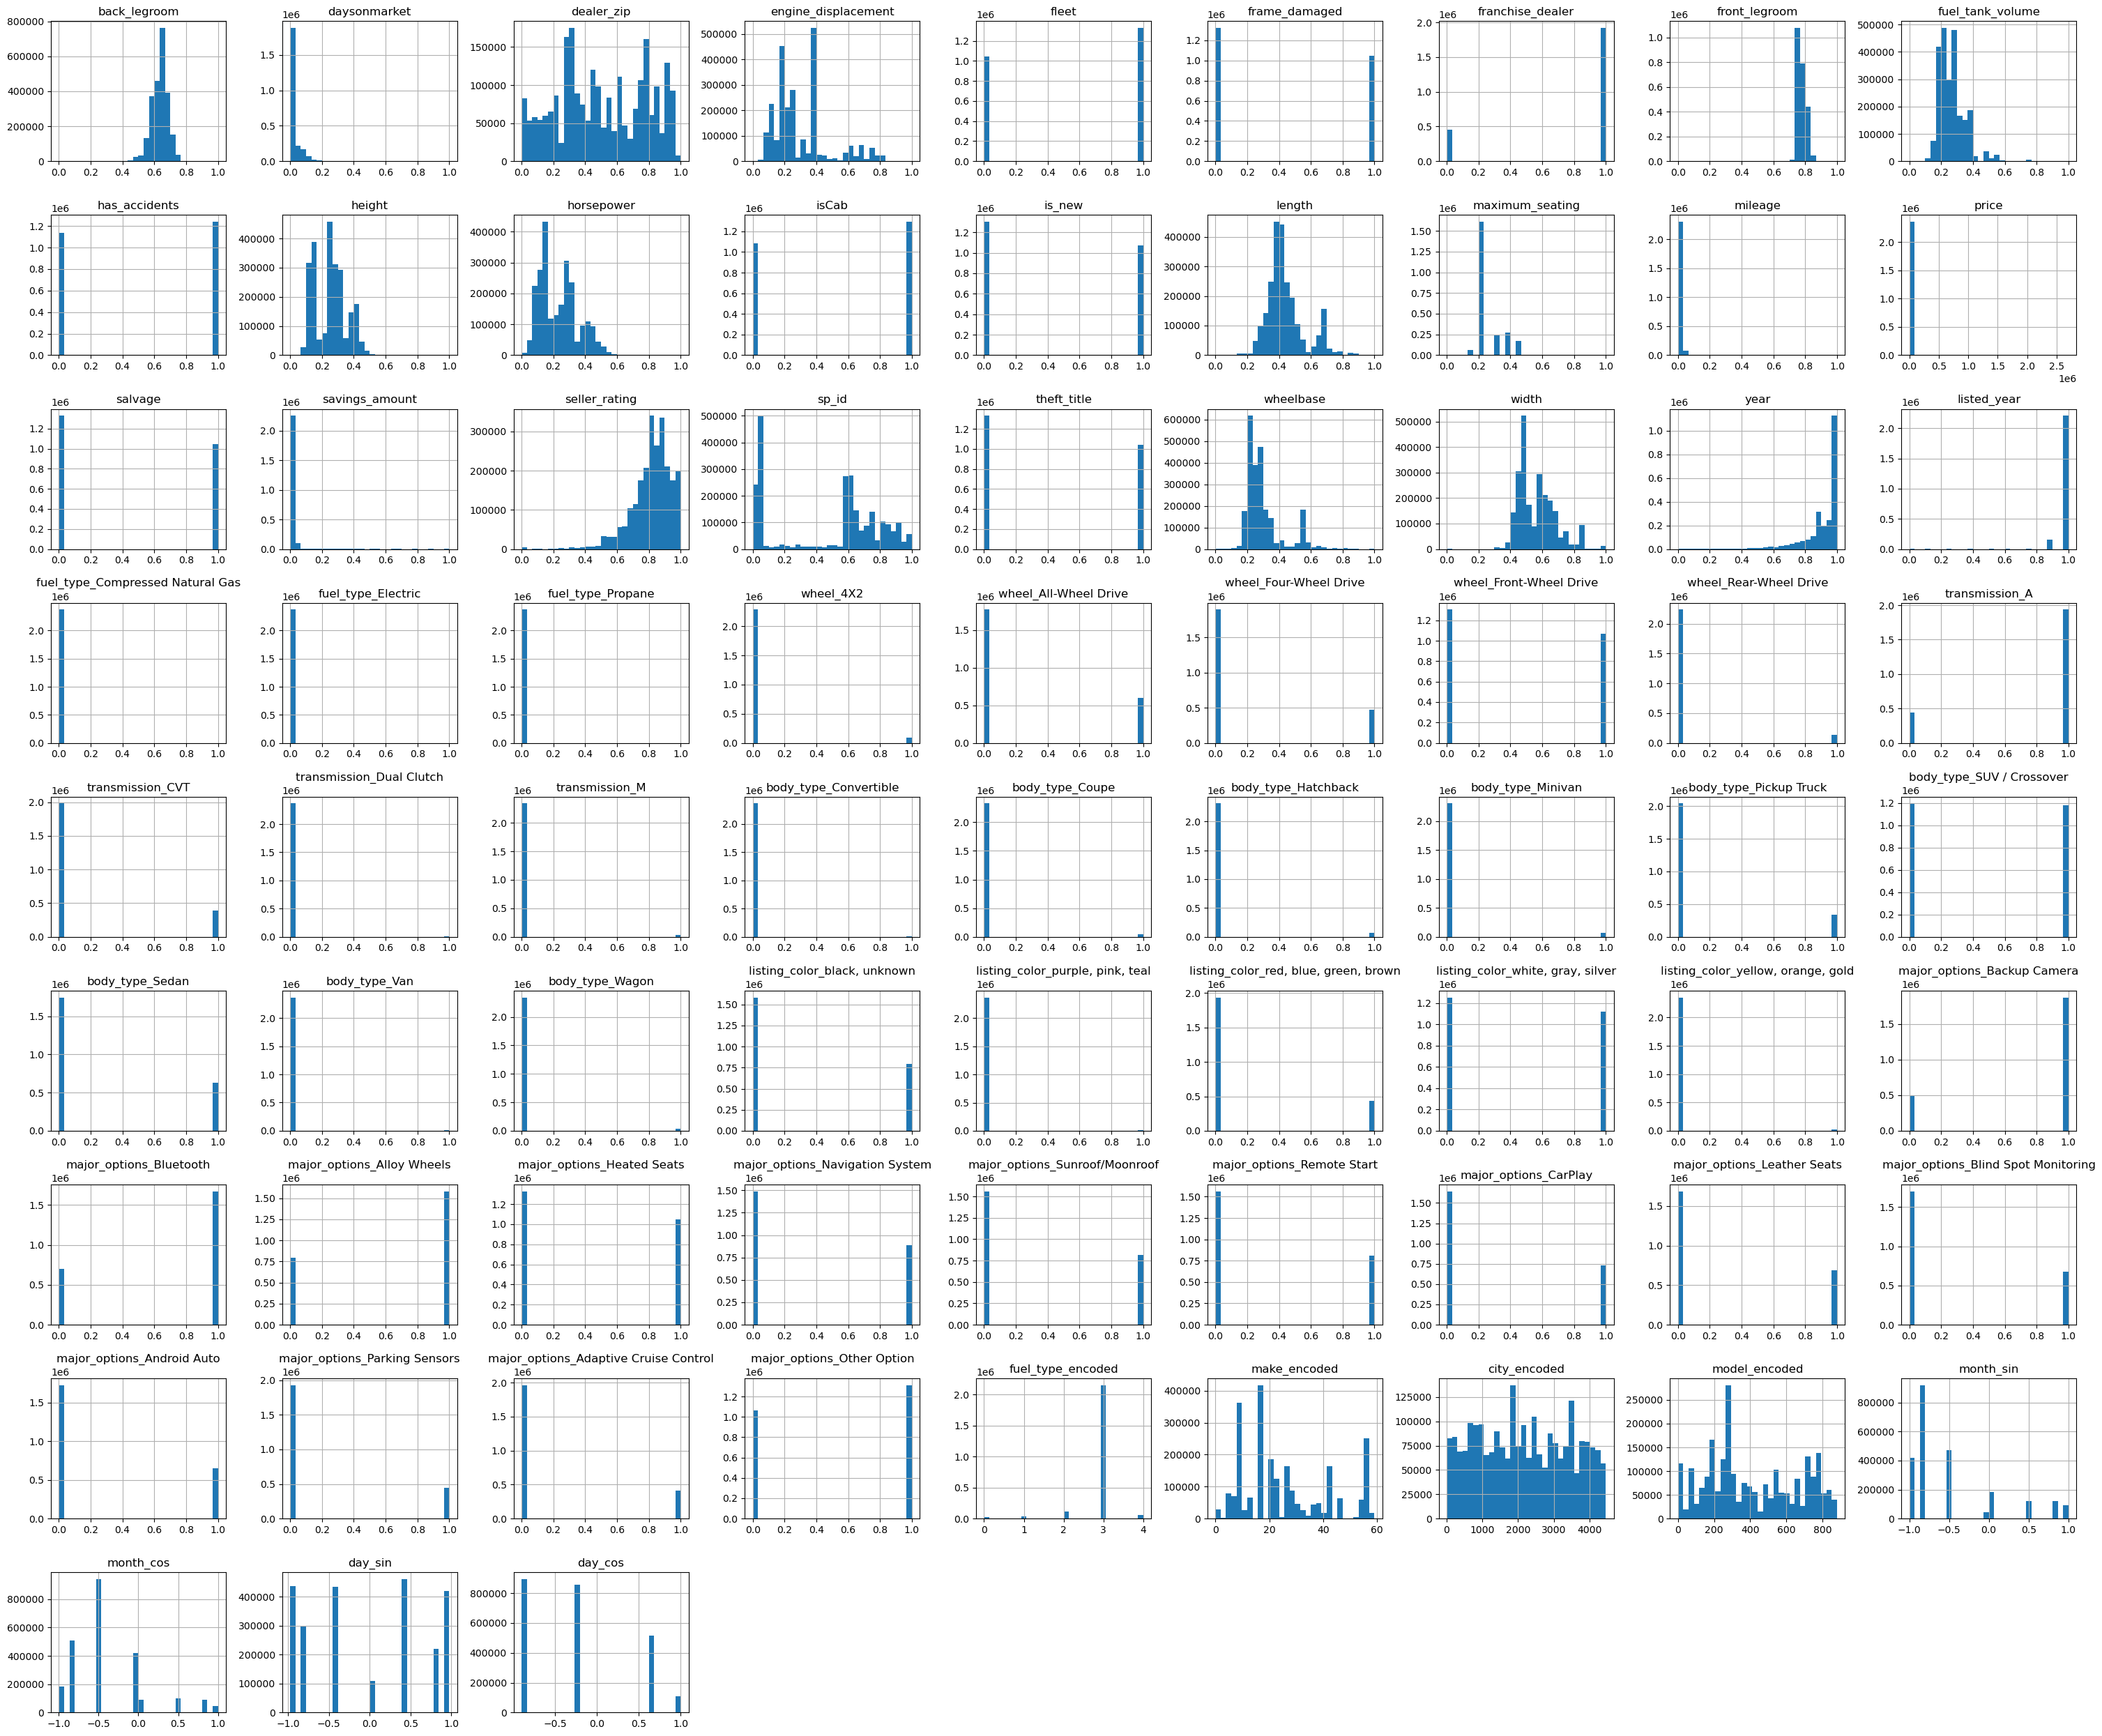

In [75]:
# Plot histograms for each feature
tf_df.hist(bins=30, figsize=(30, 25))
plt.tight_layout()
plt.show()

# Luokkamuuttujan valitseminen

Luokittelumallia käytetään luokittelemaan kuinka nopeasti myytävät autot menisivät kaupaksi. Päätimme valita kolme eri porrasta myyntiajoille:

- Lyhyt myyntiaika (Fast) 
    - alle 30 päivää
- Keskipitkä myyntiaika (Medium) 
    - 30-80 päivää
- Pitkä myyntiaika (Slow) 
    - yli 80 päivää


### Myös pari mahdollisuutta tässä

Phase 2 osiossa huomattiin, että ~80% autoista myydään 80 päivän sisään. 

Voidaan pysyä datan luonnollisen distribuution piirissä. Käytetään esim. ensimmäistä 80 päivää "cutoff pointtina" quick sale kolumnille. Tämä kuitenkin saattaa johtaa siihen, että malli on puolueellinen quick sale kategorialle ja predictiivinen tarkkuus muissa luokissa heikkenee. 

Voidaan yrittää tasata luokkia hieman, esimerkiksi laskee kynnykset, joilla noin 33 % tiedoista kuuluu kuhunkin luokkaan.

Paras olisi ehkä käyttää ~80 päivän "cutoff pointtia", mutta koska se jättää niin pienen määrän dataa muihin luokkiin voidaan määrittää arbitrary 30 päivää quick sale kategoriaksi.



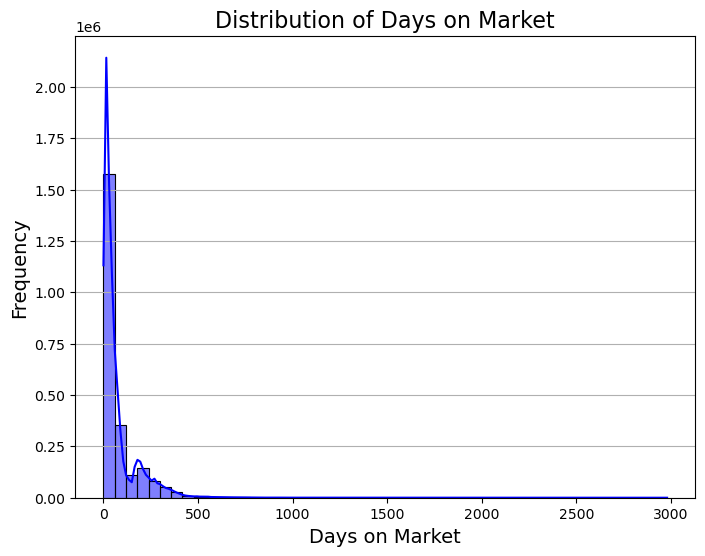

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(final_df['daysonmarket'], bins=50, kde=True, color='blue')
plt.title('Distribution of Days on Market', fontsize=16)
plt.xlabel('Days on Market', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.show()

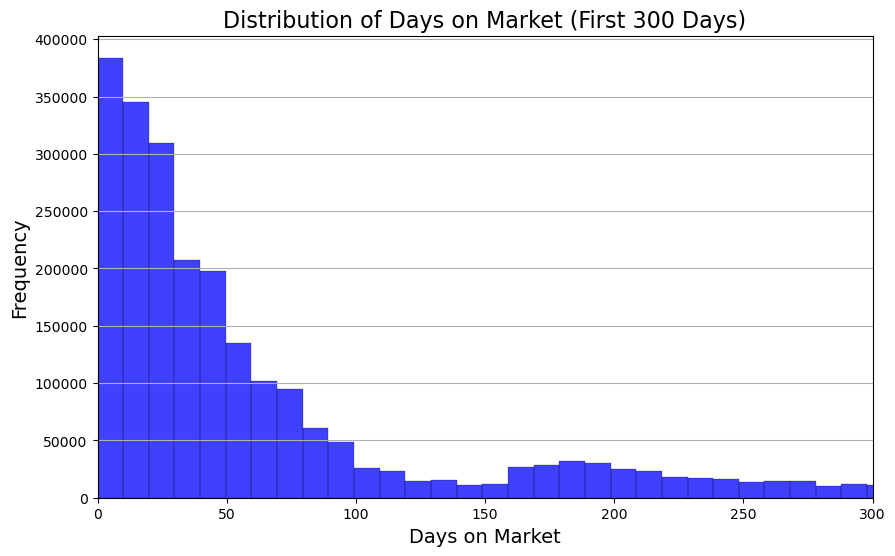

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(final_df['daysonmarket'], bins=300, kde=False, color='blue')
plt.title('Distribution of Days on Market (First 300 Days)', fontsize=16)
plt.xlabel('Days on Market', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0, 300)  # zoom in
plt.grid(axis='y')
plt.show()

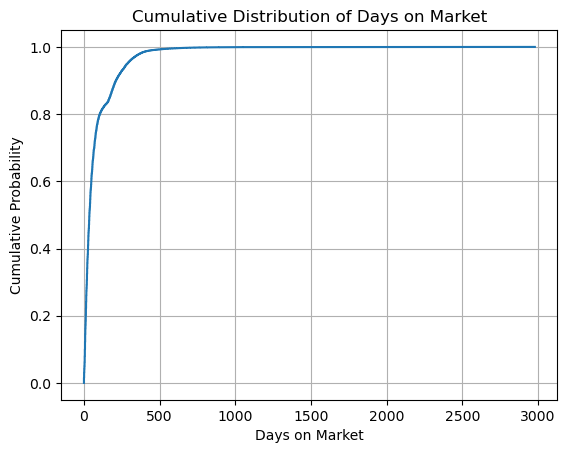

In [78]:
import numpy as np
import matplotlib.pyplot as plt

sorted_days = np.sort(final_df['daysonmarket'])
cumulative = np.arange(len(sorted_days)) / float(len(sorted_days))

plt.plot(sorted_days, cumulative)
plt.xlabel('Days on Market')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Days on Market')
plt.grid()
plt.show()

In [79]:
# Create a 3-class target variable
def categorize_days_on_market(days):
    if days < 30:
        return 1  # Fast sale
    elif days <= 80:
        return 2  # Medium
    else:
        return 3  # Stays at shop

final_df['sale_category'] = final_df['daysonmarket'].apply(categorize_days_on_market)

# Drop the original daysonmarket column (optional for phase 4)
#df = df.drop(columns=['daysonmarket'])

# distribution of the new class variable
print(final_df['sale_category'].value_counts())

sale_category
1    1038288
2     741038
3     595610
Name: count, dtype: int64


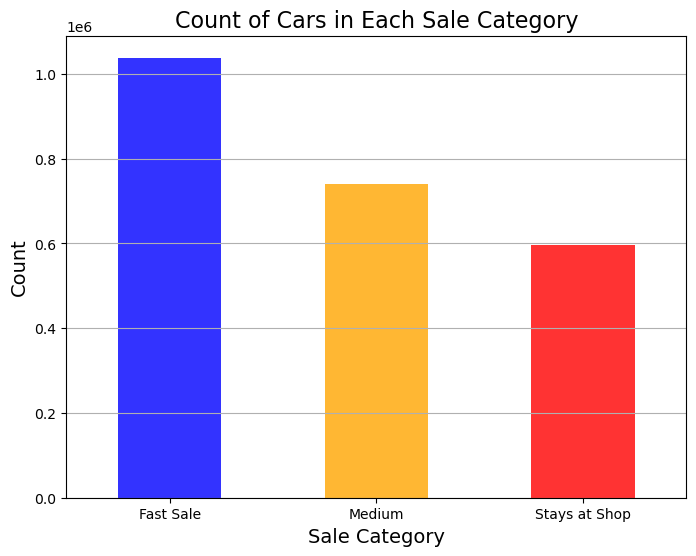

In [80]:
sale_counts = final_df['sale_category'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sale_counts.plot(kind='bar', color=['blue', 'orange', 'red'], alpha=0.8)
plt.title('Count of Cars in Each Sale Category', fontsize=16)
plt.xlabel('Sale Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=['Fast Sale', 'Medium', 'Stays at Shop'], rotation=0)
plt.grid(axis='y')
plt.show()